## Imports

In [1]:
#matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

import numpy as np
import os
import nltk
from PIL import Image
from cache import cache
from tensorflow.python import keras

/home/javanmardis/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/javanmardis/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/javanmardis/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/javanmardis/.local/lib/python3.6/site-packages/tensorflow/python/frame

In [2]:
# from tensorflow.keras.models import Model  # This does not work!
# from tensorflow.keras import backend as K
# from tensorflow.keras import layers, models, optimizers, callbacks
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Dense, GRU, Embedding, Conv2D, Layer, concatenate
# from tensorflow.keras.applications import VGG16
# from tensorflow.keras.optimizers import RMSprop, SGD
# from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.applications import InceptionV3
from keras import backend as K
from keras import layers, models, optimizers, callbacks
from keras.models import Model
from keras.layers import Input, Dense, GRU, Embedding, Conv2D, Layer, concatenate
from keras.applications import VGG16
from keras.optimizers import RMSprop
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.applications import ResNet50
from keras.applications import InceptionV3

Using TensorFlow backend.


In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/home/javanmardis/.local/lib/python3.6/site-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [4]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

config = tf.ConfigProto()
sess = tf.Session(config=config)
tf.device(tf.DeviceSpec(device_type="GPU", device_index="0"))

In [5]:
from tensorflow.python.client import device_lib
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2528853445002003955
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 5525169427567985083
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_GPU:1"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 14016673634733977233
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 9291679165829429847
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7804066202
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16603460664381793963
physical_device_desc: "device: 0, name: GeForce RTX 2080, pci bus id: 0000:0a:00.0, compute capability: 7.5"
, name: "/device:GPU:1"
device_type: "GPU"
memory_limit: 7831211213
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1737689

In [6]:
tf.device("/device:GPU:0")
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

In [7]:
# from tensorflow.python.client import device_lib 
# print(device_lib.list_local_devices())

In [8]:
# os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True
# sess = tf.Session(config=config)
# tf.device(tf.DeviceSpec(device_type="GPU", device_index="0"))

In [9]:
tf.__version__

'1.14.0'

In [10]:
import coco

In [11]:
coco.download

<module 'download' from '/scratch/shima/CapsNet-COCO-master/download.py'>

In [12]:
_, filenames_train, captions_train =coco.load_records(train=True)

- Data loaded from cache-file: /scratch/shima/data/records_train.pkl


In [13]:
np.asanyarray(captions_train).shape

(118287,)

In [14]:
# _, filenames_test, captions_test = coco.load_records(train=False)
_, filenames_val, captions_val = coco.load_records(train=False)

- Data loaded from cache-file: /scratch/shima/data/records_val.pkl


In [15]:
num_images_train = len(filenames_train)
print("number of train images : ",num_images_train)
num_caption_train = len(captions_train)
print("number of train captions : ",num_caption_train)
num_images_val = len(filenames_val)
print("number of validation images : ",num_images_val)
num_caption_val = len(captions_val)
print("number of validation captions : ",num_caption_val)

number of train images :  118287
number of train captions :  118287
number of validation images :  5000
number of validation captions :  5000


In [16]:
filenames_test=filenames_val
captions_test=captions_val

In [17]:
num_images_val = len(filenames_val)
num_images_val

5000

In [18]:
def load_image(path, size=None):
    """
    Load the image from the given file-path and resize it
    to the given size if not None.
    """

    # Load the image using PIL.
    img = Image.open(path)

    # Resize image if desired.
    if not size is None:
        img = img.resize(size=size, resample=Image.LANCZOS)

    # Convert image to numpy array.
    img = np.array(img)

    # Scale image-pixels so they fall between 0.0 and 1.0
    img = img / 255.0

    # Convert 2-dim gray-scale array to 3-dim RGB array.
    if (len(img.shape) == 2):
        img = np.repeat(img[:, :, np.newaxis], 3, axis=2)

    return img

In [19]:
def show_image(idx, train):
    """
    Load and plot an image from the training- or validation-set
    with the given index.
    """

    if train:
        # Use an image from the training-set.
        dir = coco.train_dir
        filename = filenames_train[idx]
        captions = captions_train[idx]
    else:
        # Use an image from the validation-set.
        dir = coco.val_dir
        filename = filenames_val[idx]
        captions = captions_val[idx]

    # Path for the image-file.
    path = os.path.join(dir, filename)

    # Print the captions for this image.
    for caption in captions:
        print(caption)
    
    # Load the image and plot it.
    img = load_image(path)
    plt.imshow(img)
    plt.show()

An airplane sitting in the middle of a city. 
An airplane on a bridge over a highway.
A large jetliner taking off from an airport runway.
Very large JAL jet taxiing on the runway at airport in urban environment
A JAL airplane taxiing down a runway in a city.


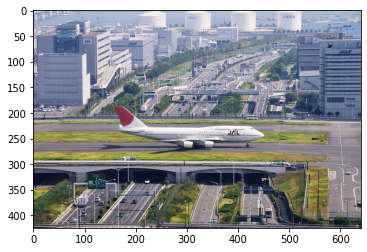

In [20]:
show_image(idx=100, train=True)

In [21]:
image_model = InceptionV3()
print (image_model.summary())
transfer_layer=image_model.get_layer('avg_pool')

# Surgery











__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
co

In [22]:
import h5py
import pickle
import argparse
# from keras import  optimizers, callbacks
from tensorflow.keras.utils import to_categorical
from utils3 import combine_images,plot_log
from capsule_layers import CapsuleLayer, PrimaryCap, Length, Mask

K.set_image_data_format('channels_last')


def CapsNet(input_shape, n_class, routings):
    """
    A Capsule Network on MSCOCO.
    :param input_shape: data shape, 3d, [width, height, channels]
    :param n_class: number of classes
    :param routings: number of routing iterations
    :return: Two Keras Models, the first one used for training, and the second one for evaluation.
            `eval_model` can also be used for training.
    """
    x = Input(shape=input_shape)

    # Layers 1-3: Just some conventional Conv2D layers
    conv1 = Conv2D(filters=96, kernel_size=13, strides=4, padding='valid', activation='relu', name='conv1')(x)
    conv2 = Conv2D(filters=96, kernel_size=5, strides=2, padding='valid', activation='relu', name='conv2')(conv1)
    conv3 = Conv2D(filters=256, kernel_size=9, strides=1, padding='valid', activation='relu', name='conv3')(conv2)


    # Layer 4: Conv2D layer with `squash` activation, then reshape to [None, num_capsule, dim_capsule]
    primary_caps = PrimaryCap(conv3, dim_capsule=8, n_channels=32, kernel_size=9, strides=2, padding='valid')

    # Layer 3: Capsule layer. Routing algorithm works here.
    category_caps = CapsuleLayer(num_capsule=n_class, dim_capsule=16, routings=routings,name='category_caps')(primary_caps)

    # Layer 4: This is an auxiliary layer to replace each capsule with its length. Just to match the true label's shape.
    # If using tensorflow, this will not be necessary. :)
    out_caps = Length(name='capsnet')(category_caps)

    # Decoder network.
    y = Input(shape=(n_class,))
    masked_by_y = Mask()([category_caps, y])  # The true label is used to mask the output of capsule layer. For training
    masked = Mask()(category_caps)  # Mask using the capsule with maximal length. For prediction

    # Shared Decoder model in training and prediction
    decoder = models.Sequential(name='decoder')
    decoder.add(Dense(512, activation='relu', input_dim=16*n_class))
    decoder.add(Dense(1024, activation='relu'))
#     decoder.add(layers.Dense(np.prod(input_shape), activation='sigmoid'))
#     decoder.add(layers.Reshape(target_shape=input_shape, name='out_recon'))
    
    # Models for training and evaluation (prediction)
    train_model = Model([x, y], [out_caps, decoder(masked_by_y)])
    eval_model = Model(x, [out_caps, decoder(masked)])

    # manipulate model
    noise = Input(shape=(n_class, 16))
    noised_category_caps = layers.Add()([category_caps, noise])
    masked_noised_y = Mask()([noised_category_caps, y])
    manipulate_model =Model([x, y, noise], decoder(masked_noised_y))

    return train_model, eval_model, manipulate_model

def margin_loss(y_true, y_pred):
    """
    Margin loss for Eq.(4). When y_true[i, :] contains not just one `1`, this loss should work too. Not test it.
    :param y_true: [None, n_classes]
    :param y_pred: [None, num_capsule]
    :return: a scalar loss value.
    """
    L = y_true * K.square(K.maximum(0., 0.9 - y_pred)) + \
        0.5 * (1 - y_true) * K.square(K.maximum(0., y_pred - 0.1))

    return K.mean(K.sum(L, 1))


def train(model, data, args):
    """
    Training a CapsuleNet
    :param model: the CapsuleNet model
    :param data: a tuple containing training and testing data, like `((x_train, y_train), (x_test, y_test))`
    :param args: arguments
    :return: The trained model
    """
    # unpacking the data
    (x_train, y_train), (x_test, y_test) = data

    # callbacks
    log = callbacks.CSVLogger(args['save_dir'] + '/log.csv')
    tb = callbacks.TensorBoard(log_dir=args['save_dir'] + '/tensorboard-logs',
                               batch_size=args['batch_size'], histogram_freq=int(args['debug']))
    checkpoint = callbacks.ModelCheckpoint(args['save_dir'] + '/weights-{epoch:02d}.h5', monitor='val_capsnet_acc',
                                           save_best_only=True, save_weights_only=True, verbose=1)
    lr_decay = callbacks.LearningRateScheduler(schedule=lambda epoch: args['lr'] * (args['lr_decay'] ** epoch))
    early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1)

    # compile the model

    model.compile(optimizer=optimizers.Adam(lr=args['lr']),
                  loss=[margin_loss, 'mse'],
                  loss_weights=[1., args['lam_recon']],
                  metrics={'capsnet': 'accuracy'})

    
    # Training without data augmentation:
    model.fit(
        [x_train, y_train],
        [y_train, x_train],
        batch_size=args['batch_size'],
        epochs=args['epochs'],
        validation_data=[[x_test, y_test], [y_test, x_test]],
        callbacks=[log, tb, checkpoint, lr_decay, early_stop]
    )

def test(model, data, args):
    x_test, y_test = data
    y_pred, x_recon = model.predict(x_test, batch_size=100)
    print('-' * 30 + 'Begin: test' + '-' * 30)
    print('Test acc:', np.sum(np.argmax(y_pred, 1) == np.argmax(y_test, 1)) / y_test.shape[0])

    img = combine_images(np.concatenate([x_test[:50], x_recon[:50]]))
    image = img * 255
    Image.fromarray(image.astype(np.uint8)).save(args.save_dir + "/real_and_recon.png")
    print()
    print('Reconstructed images are saved to %s/real_and_recon.png' % args.save_dir)
    print('-' * 30 + 'End: test' + '-' * 30)
    plt.imshow(plt.imread(args.save_dir + "/real_and_recon.png"))
    plt.show()


def manipulate_latent(model, data, args):
    print('-' * 30 + 'Begin: manipulate' + '-' * 30)
    x_test, y_test = data
    index = np.argmax(y_test, 1) == args.digit
    number = np.random.randint(low=0, high=sum(index) - 1)
    x, y = x_test[index][number], y_test[index][number]
    x, y = np.expand_dims(x, 0), np.expand_dims(y, 0)
    noise = np.zeros([1, 80, 16])
    x_recons = []
    for dim in range(16):
        for r in [-0.25, -0.2, -0.15, -0.1, -0.05, 0, 0.05, 0.1, 0.15, 0.2, 0.25]:
            tmp = np.copy(noise)
            tmp[:, :, dim] = r
            x_recon = model.predict([x, y, tmp])
            x_recons.append(x_recon)

    x_recons = np.concatenate(x_recons)

    img = combine_images(x_recons, height=16)
    image = img * 255
    Image.fromarray(image.astype(np.uint8)).save(args.save_dir + '/manipulate-%d.png' % args.digit)
    print('manipulated result saved to %s/manipulate-%d.png' % (args.save_dir, args.digit))
    print('-' * 30 + 'End: manipulate' + '-' * 30)



def load_coco(dataset_file, map_file):
    """
    Load preprocessed MSCOCO 2017 dataset
    """
    print('\nLoading dataset...')
    
#     x=HDF5Matrix(dataset_file, 'x')
#     y=HDF5Matrix(dataset_file, 'y')  
    h5f = h5py.File(dataset_file, 'r')
    x = h5f['x'][:]
    y = h5f['y'][:]
    h5f.close()

    split = int(x.shape[0] * 0.8)  # 80% of data is assigned to the training set
    x_train, y_train = x[:split], y[:split]
    x_test, y_test = x[split:], y[split:]

    with open(map_file, 'rb') as mapping:
        category_id_map = pickle.load(mapping)
    id_category = category_id_map['id_category']
    print('Done.')

    return (x_train, y_train), (x_test, y_test), id_category


if __name__ == "__main__":

    # setting the hyper parameters
    parser = argparse.ArgumentParser(description="Capsule Network on MSCOCO 2017.")
    parser.add_argument('--epochs', default=1, type=int)
    parser.add_argument('--batch_size', default=100, type=int)
    parser.add_argument('--lr', default=0.001, type=float, help="Initial learning rate")
    parser.add_argument('--lr_decay', default=1, type=float,
                        help="The value multiplied by lr at each epoch. Set a larger value for larger epochs")
    parser.add_argument('--lam_recon', default=0.392, type=float, help="The coefficient for the loss of decoder")
    parser.add_argument('-r', '--routings', default=3, type=int,
                        help="Number of iterations used in routing algorithm. should > 0")  # num_routing should > 0
    parser.add_argument('--debug', action='store_true', help="Save weights by TensorBoard")
    parser.add_argument('--save_dir', default='./result')
    parser.add_argument(
        '--dataset_file', default=os.path.join(os.path.dirname(os.path.abspath('__file__')), 'dataset/capsnet_train_data.h5'),
        help='File having the preprocessed dataset')
    parser.add_argument('-t', '--testing', action='store_true',
                        help='Test the trained model on testing dataset')
    parser.add_argument('--digit', default=5, type=int,
                        help="Digit to manipulate")
    parser.add_argument('-w', '--weights', default=None,
                        help="The path of the saved weights. Should be specified when testing")
    
    parser.add_argument(
        '--map_file', default=os.path.join(os.path.dirname(os.path.realpath('__file__')), 'dataset/coco_raw.pickle'),
        help='File having the id to category map'
    )
    args = parser.parse_known_args()[0]
    print(args)

    if not os.path.exists(args.save_dir):
        os.makedirs(args.save_dir)

    # load data
    (x_train, y_train), (x_test, y_test), id_category = load_coco(args.dataset_file, args.map_file)

    # define model
    model, eval_model, manipulate_model = CapsNet(
        input_shape=(299, 299, 3),
        n_class=y_train.shape[1],
        routings=args.routings
    )


    model.summary()

    # train or test
#     if args.weights is not None:  # init the model weights with provided one
#         model.load_weights(args.weights)
#     if not args.testing:

#         train(model=model, data=((x_train, y_train), (x_test, y_test)), args=vars(args))
#     else:  # as long as weights are given, will run testing
#         if args.weights is None:
#             print('No weights are provided. Will test using random initialized weights.')
#         manipulate_latent(manipulate_model, (x_test, y_test), args)
#         test(model=eval_model, data=(x_test, y_test), args=args)

Namespace(batch_size=100, dataset_file='/scratch/shima/CapsNet-COCO-master/dataset/capsnet_train_data.h5', debug=False, digit=5, epochs=1, lam_recon=0.392, lr=0.001, lr_decay=1, map_file='/scratch/shima/CapsNet-COCO-master/dataset/coco_raw.pickle', routings=3, save_dir='./result', testing=False, weights=None)

Loading dataset...
Done.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 72, 72, 96)   48768       input_2[0][0]                    
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 34, 34, 96)   230496      conv

In [23]:
label_layer = image_model.get_layer('predictions')
label_layer.output

<tf.Tensor 'predictions/Softmax:0' shape=(?, 1000) dtype=float32>

In [24]:
print(eval_model.input)
print(image_model.input)
print(eval_model.output[1])
print(transfer_layer.output)

Tensor("input_2:0", shape=(?, 299, 299, 3), dtype=float32)
Tensor("input_1:0", shape=(?, 299, 299, 3), dtype=float32)
Tensor("decoder_1/dense_2/Relu:0", shape=(?, 1024), dtype=float32)
Tensor("avg_pool/Mean:0", shape=(?, 2048), dtype=float32)


In [25]:
tf.concat([eval_model.output[1],transfer_layer.output],1)

<tf.Tensor 'concat:0' shape=(?, 3072) dtype=float32>

In [26]:
transfer_layer.output

<tf.Tensor 'avg_pool/Mean:0' shape=(?, 2048) dtype=float32>

In [27]:
capsule_model=models.Model(inputs=eval_model.input,outputs=eval_model.output[1])
capsule_model.output

<tf.Tensor 'decoder_1/dense_2/Relu:0' shape=(?, 1024) dtype=float32>

In [28]:
# print (bottleneck_model.summary())
image_model_transfer = models.Model(inputs=image_model.input, outputs=image_model.get_layer('avg_pool').output)
# image_model_transfer= image_model
image_model_transfer.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [29]:
img_size = K.int_shape(image_model.input)[1:3]
img_size

(299, 299)

In [30]:
# img_size1 = K.int_shape(image_model_capsule.input[0])[1:3]
# img_size2 = K.int_shape(image_model_capsule.input[1])[1:3]
len(filenames_val)

5000

In [31]:
# transfer_values_size = K.int_shape(transfer_layer.output)[1]
transfer_values_size=3072

In [32]:
def print_progress(count, max_count):
    # Percentage completion.
    pct_complete = count / max_count

    # Status-message. Note the \r which means the line should
    # overwrite itself.
    msg = "\r- Progress: {0:.1%}".format(pct_complete)

    # Print it.
    sys.stdout.write(msg)
    sys.stdout.flush()

In [33]:
def process_images(data_dir, filenames, batch_size=32):
    """
    Process all the given files in the given data_dir using the
    pre-trained image-model and return their transfer-values.
    
    Note that we process the images in batches to save
    memory and improve efficiency on the GPU.
    """
    
    # Number of images to process.
    num_images = len(filenames)

    # Pre-allocate input-batch-array for images.
    shape = (batch_size,) + img_size + (3,)
    image_batch = np.zeros(shape=shape, dtype=np.float16)

    # Pre-allocate output-array for transfer-values.
    # Note that we use 16-bit floating-points to save memory.
    shape = (num_images, transfer_values_size)
    transfer_values = np.zeros(shape=shape, dtype=np.float16)

    # Initialize index into the filenames.
    start_index = 0

    # Process batches of image-files.
    while start_index < num_images:
        # Print the percentage-progress.
        print_progress(count=start_index, max_count=num_images)

        # End-index for this batch.
        end_index = start_index + batch_size

        # Ensure end-index is within bounds.
        if end_index > num_images:
            end_index = num_images

        # The last batch may have a different batch-size.
        current_batch_size = end_index - start_index

        # Load all the images in the batch.
        for i, filename in enumerate(filenames[start_index:end_index]):
            # Path for the image-file.
            path = os.path.join(data_dir, filename)

            # Load and resize the image.
            # This returns the image as a numpy-array.
            img = load_image(path, size=img_size)

            # Save the image for later use.
            image_batch[i] = img

        # Use the pre-trained image-model to process the image.
        # Note that the last batch may have a different size,
        # so we only use the relevant images.
        transfer_values_batch = \
            np.concatenate([image_model_transfer.predict(image_batch[0:current_batch_size]),capsule_model.predict(image_batch[0:current_batch_size])],1)
#             image_model_transfer.predict(image_batch[0:current_batch_size])

        # Save the transfer-values in the pre-allocated array.
        transfer_values[start_index:end_index] = \
            transfer_values_batch[0:current_batch_size]

        # Increase the index for the next loop-iteration.
        start_index = end_index

    # Print newline.
    print()

    return transfer_values

In [34]:
def process_images_label(data_dir, filenames, batch_size=32):
    """
    Process all the given files in the given data_dir using the
    pre-trained image-model and return their transfer-values.
    
    Note that we process the images in batches to save
    memory and improve efficiency on the GPU.
    """
    
    # Number of images to process.
    num_images = len(filenames)
     

    # Pre-allocate input-batch-array for images.
    shape = (batch_size,) + img_size + (3,)
    shape2 = (batch_size,) + (1000,)
    image_batch = np.zeros(shape=shape, dtype=np.float16)
    shape2 = (num_images,1000)
    label_values = np.zeros(shape=shape2, dtype=np.float16)

    # Initialize index into the filenames.
    start_index = 0

    # Process batches of image-files.
    while start_index < num_images:
        # Print the percentage-progress.
        print_progress(count=start_index, max_count=num_images)

        # End-index for this batch.
        end_index = start_index + batch_size

        # Ensure end-index is within bounds.
        if end_index > num_images:
            end_index = num_images

        # The last batch may have a different batch-size.
        current_batch_size = end_index - start_index

        # Load all the images in the batch.
        for i, filename in enumerate(filenames[start_index:end_index]):
            # Path for the image-file.
            path = os.path.join(data_dir, filename)

            # Load and resize the image.
            # This returns the image as a numpy-array.
            img = load_image(path, size=img_size)

            # Save the image for later use.
            image_batch[i] = img


        label_value_batch = image_model.predict(image_batch[0:current_batch_size])

        label_values[start_index:end_index] =label_value_batch[0:current_batch_size]

        # Increase the index for the next loop-iteration.
        start_index = end_index

    # Print newline.
    print()

    return label_values


In [35]:
def process_images_train():
    print("Processing {0} images in training-set ...".format(len(filenames_train)))

    # Path for the cache-file.
    cache_path1 = os.path.join(coco.data_dir,
                              "capsule_inception_train.pkl")
    cache_path2 = os.path.join(coco.data_dir, "label_inception_train.pkl")

    # If the cache-file already exists then reload it,
    # otherwise process all images and save their transfer-values
    # to the cache-file so it can be reloaded quickly.
    transfer_values = cache(cache_path=cache_path1,
                            fn=process_images,
                            data_dir=coco.train_dir,
                            filenames=filenames_train)

    label_values = cache(cache_path=cache_path2,
                            fn=process_images_label,
                            data_dir=coco.train_dir,
                            filenames=filenames_train)

    return transfer_values,label_values

In [36]:
[transfer_values,label_values]=process_images_train()
print(np.asanyarray(transfer_values).shape)
print(np.asanyarray(label_values).shape)

Processing 118287 images in training-set ...
- Data loaded from cache-file: /scratch/shima/data/capsule_inception_train.pkl
- Data loaded from cache-file: /scratch/shima/data/label_inception_train.pkl
(118287, 3072)
(118287, 1000)


In [37]:
def process_images_val():
    print("Processing {0} images in validation-set ...".format(len(filenames_val)))

    # Path for the cache-file.
#     cache_path = os.path.join(coco.data_dir, "capsule_transfer_values_val.pkl")
    cache_path1 = os.path.join(coco.data_dir, "capsule_inception_val.pkl")
    cache_path2 = os.path.join(coco.data_dir, "label_inception_val.pkl")

    # If the cache-file already exists then reload it,
    # otherwise process all images and save their transfer-values
    # to the cache-file so it can be reloaded quickly.
    transfer_values = cache(cache_path=cache_path1,
                            fn=process_images,
                            data_dir=coco.val_dir,
                            filenames=filenames_val)
    label_values = cache(cache_path=cache_path2,
                            fn=process_images_label,
                            data_dir=coco.val_dir,
                            filenames=filenames_val)
    

    return transfer_values,label_values

In [38]:
[transfer_values,label_values]=process_images_val()
print(np.asanyarray(transfer_values).shape)
print(np.asanyarray(label_values).shape)

Processing 5000 images in validation-set ...
- Data loaded from cache-file: /scratch/shima/data/capsule_inception_val.pkl
- Data loaded from cache-file: /scratch/shima/data/label_inception_val.pkl
(5000, 3072)
(5000, 1000)


In [39]:
# ***************if we dont want to run below cell and load saved value***************
# import os

# base_path = "/scratch/data/"
# filename = "capsule_transfer_values_train_caps.pkl"
# path_to_file = os.path.join(base_path, filename)
# filename2 = "capsule_transfer_values_val.pkl"
# path_to_file2 = os.path.join(base_path, filename2)

# filename3 = "label_values_train.pkl"
# path_to_file3 = os.path.join(base_path, filename3)
# filename4 = "label_values_val.pkl"
# path_to_file4 = os.path.join(base_path, filename4)


# transfer_values_train_caps =open(path_to_file)
# transfer_values_val_caps =open(path_to_file2)

# # label_train_caps =open(path_to_file3)
# label_val_caps =open(path_to_file4)


In [40]:
# %%time
# import sys
# # transfer_values_train_caps = process_images_train()
# [transfer_values_train_caps,label_values] = process_images_train()
# print("dtype:", transfer_values_train_caps.dtype)
# print("shape:", transfer_values_train_caps.shape)
# %%time
import sys
# transfer_values_train_caps = process_images_train()
[capsule_inception_train,label_inception_train] = process_images_train()
print("dtype:", capsule_inception_train.dtype)
print("shape:", capsule_inception_train.shape)
print("dtype:", label_inception_train.dtype)
print("shape:", label_inception_train.shape)

Processing 118287 images in training-set ...
- Data loaded from cache-file: /scratch/shima/data/capsule_inception_train.pkl
- Data loaded from cache-file: /scratch/shima/data/label_inception_train.pkl
dtype: float16
shape: (118287, 3072)
dtype: float16
shape: (118287, 1000)


In [41]:
# %%time
# transfer_values_val_caps = process_images_val()
# print("dtype:", transfer_values_val_caps.dtype)
# print("shape:", transfer_values_val_caps.shape)
[capsule_inception_val,label_inception_val] = process_images_val()
print("dtype:", capsule_inception_val.dtype)
print("shape:", capsule_inception_val.shape)
print("dtype:", label_inception_val.dtype)
print("shape:", label_inception_val.shape)


Processing 5000 images in validation-set ...
- Data loaded from cache-file: /scratch/shima/data/capsule_inception_val.pkl
- Data loaded from cache-file: /scratch/shima/data/label_inception_val.pkl
dtype: float16
shape: (5000, 3072)
dtype: float16
shape: (5000, 1000)


In [42]:
transfer_values_test=capsule_inception_val
label_test=label_inception_val
temp1=capsule_inception_train
temp2=label_inception_train
temp3=filenames_train
temp4=captions_train

In [43]:
captions_train_train=captions_train
print(capsule_inception_train.shape)
print(label_inception_train.shape)
print(capsule_inception_val.shape)
print(label_inception_val.shape)
print(np.asanyarray(captions_train_train).shape)

(118287, 3072)
(118287, 1000)
(5000, 3072)
(5000, 1000)
(118287,)


In [44]:
np.asanyarray(filenames_val).shape

(5000,)

In [45]:
# image_model_transfer.f
from keras_applications.inception_v3 import decode_predictions 
yhat=decode_predictions(label_inception_train, top=3, utils=tf.keras.utils)
yhat2=decode_predictions(label_inception_val, top=5, utils=tf.keras.utils)

In [46]:
print((np.asanyarray(yhat))[1,:])

[['n02128385' 'leopard' '0.1004']
 ['n02130308' 'cheetah' '0.1001']
 ['n02641379' 'gar' '0.0864']]


In [47]:
extra_labels=(np.asanyarray(yhat)[:,:,1])
print(extra_labels[0:5,:])
# .shape
extra_labels.shape

[['meat_loaf' 'broccoli' 'cauliflower']
 ['leopard' 'cheetah' 'gar']
 ['vase' 'hummingbird' 'pot']
 ['zebra' 'hartebeest' 'ostrich']
 ['umbrella' 'maillot' 'maillot']]


(118287, 3)

In [48]:
# _, _, captions_train =coco.load_records(train=True)
# captions_train_train=captions_train[ii:ii+113287]
captions_train2=captions_train_train

In [49]:
captions_train2_list=[]
captions_train2_list
capsule_inception_train.shape[0]

118287

In [50]:
# captions_train2 = np.load("Caption_file.npy",allow_pickle="True")
# a[100]
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#   # Restrict TensorFlow to only use the first GPU
#   try:
#     tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
#     logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#     print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
#   except RuntimeError as e:
#     # Visible devices must be set before GPUs have been initialized
#     print(e)


In [51]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#   # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
#   try:
#     tf.config.experimental.set_virtual_device_configuration(
#         gpus[0],
#         [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])
#     logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#     print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#   except RuntimeError as e:
#     # Virtual devices must be set before GPUs have been initialized
#     print(e)

In [52]:
import nltk
nltk.download('punkt')

from nltk import word_tokenize,sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     /home/javanmardis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [53]:
import wikipediaapi
wiki_wiki = wikipediaapi.Wikipedia(language='en', extract_format=wikipediaapi.ExtractFormat.WIKI)
path='/home/javanmardis/shima/CapsNet-COCO-master/Caption_file.npy'
captions_train2 = np.load("Caption_file.npy",allow_pickle="True")
# if os.path.exists(path):
#     captions_train2 = np.load("Caption_file.npy",allow_pickle="True")
# else:
    
# for a in range (capsule_inception_train.shape[0]):
#     for a in range (0,113287):
#     for a in range (0,118287):
#         for b in range(3):
#             wiki_label=extra_labels[a,:][b]
#             wiki_wiki = wikipediaapi.Wikipedia(language='en', extract_format=wikipediaapi.ExtractFormat.WIKI)
#             p_wiki = wiki_wiki.page(wiki_label)
#     #         new_string=p_wiki.summary
#             captions_train2_list= nltk.tokenize.sent_tokenize(p_wiki.text)
#             captions_train2[a].extend(captions_train2_list[0:5]) 

#         print(a,end='\r')
# #Save augmented caption file
# data = np.array(captions_train2)
# np.save("Caption_file", data)
    
    

In [54]:
# for jj in range (118287):
#     len_sen=len(captions_train2[jj])
#     if len_sen<20:
#         diff= 20-len(captions_train2[jj])
#         captions_train2[jj].extend(captions_train2[0:diff])
#     if len_sen>20:
#         diff= len(captions_train2[jj])-20
#         captions_train2[jj] =captions_train2[jj][:-diff] 

In [55]:
captions_train2.size

118287

In [56]:
import string
for cc in range (len(captions_train2)):
    captions_train2[cc] = [''.join(c for c in s if c not in string.punctuation) for s in captions_train2[cc]]
#     captions_train2[cc] = [''.join(c for c in s if c not in string.whitespace) for s in captions_train2[cc]]

In [57]:
# import string
# for cc in range (len(captions_train2)):
#     for dd in range(20):
    
#         [dd]=captions_train2[cc][dd].translate(string.punctuation) 
#         captions_train2[cc][dd]=captions_train2[cc][dd].translate(string.whitespace)
        


In [58]:
captions_train2[100]

['An airplane sitting in the middle of a city ',
 'An airplane on a bridge over a highway',
 'A large jetliner taking off from an airport runway',
 'Very large JAL jet taxiing on the runway at airport in urban environment',
 'A JAL airplane taxiing down a runway in a city',
 'An airliner is a type of aircraft for transporting  passengers and air cargo',
 'Such aircraft are most often operated by airlines',
 'Although the definition of an airliner can vary from country to country an airliner is typically defined as an airplane intended for carrying multiple passengers or cargo in commercial service',
 'The largest of them are widebody jets which are also called twinaisle because they generally have two separate aisles running from the front to the back of the passenger cabin',
 'These are usually used for longhaul flights between airline hubs and major cities',
 'A wing is a type of fin that produces lift while moving through air or some other fluid',
 'As such wings have streamlined cr

In [59]:
mark_start = 'ssss '
mark_end = ' eeee'

In [60]:
captions_train=captions_train2
len(captions_train[1])

20

In [61]:
def mark_captions(captions_listlist):
    captions_marked = [[mark_start + caption + mark_end
                        for caption in captions_list]
                        for captions_list in captions_listlist]
    
    return captions_marked

In [62]:
captions_train_marked = mark_captions(captions_train)
captions_train_marked[0]

['ssss Closeup of bins of food that include broccoli and bread eeee',
 'ssss A meal is presented in brightly colored plastic trays eeee',
 'ssss there are containers filled with different kinds of foods eeee',
 'ssss Colorful dishes holding meat vegetables fruit and bread eeee',
 'ssss A bunch of trays that have different food eeee',
 'ssss Meatloaf is a dish of ground meat that has been mixed with other ingredients and formed into the shape of a loaf then baked or smoked eeee',
 'ssss The final shape is either handformed on a baking tray or panformed by cooking it in a loaf pan eeee',
 'ssss It is usually made with ground beef although ground lamb pork veal venison poultry and seafood are also used sometimes in combination eeee',
 'ssss Vegetarian adaptations may use imitation meat or pulses eeee',
 'ssss The cooked loaf can be sliced like a loaf of bread to make individual portions eeee',
 'ssss Broccoli is an edible green plant in the cabbage family family Brassicaceae genus Brassic

In [63]:
def flatten(captions_listlist):
    captions_list = [caption
                     for captions_list in captions_listlist
                     for caption in captions_list]
    
    return captions_list

In [64]:
captions_train_flat = flatten(captions_train_marked)

In [65]:
num_words = 10000

In [66]:
class TokenizerWrap(Tokenizer):
    """Wrap the Tokenizer-class from Keras with more functionality."""
    
    def __init__(self, texts, num_words=None):
        """
        :param texts: List of strings with the data-set.
        :param num_words: Max number of words to use.
        """

        Tokenizer.__init__(self, num_words=num_words)

        # Create the vocabulary from the texts.
        self.fit_on_texts(texts)

        # Create inverse lookup from integer-tokens to words.
        self.index_to_word = dict(zip(self.word_index.values(),
                                      self.word_index.keys()))

    def token_to_word(self, token):
        """Lookup a single word from an integer-token."""

        word = " " if token == 0 else self.index_to_word[token]
        return word 

    def tokens_to_string(self, tokens):
        """Convert a list of integer-tokens to a string."""

        # Create a list of the individual words.
        words = [self.index_to_word[token]
                 for token in tokens
                 if token != 0]
        
        # Concatenate the words to a single string
        # with space between all the words.
        text = " ".join(words)

        return text
    
    def captions_to_tokens(self, captions_listlist):
        """
        Convert a list-of-list with text-captions to
        a list-of-list of integer-tokens.
        """
        
        # Note that text_to_sequences() takes a list of texts.
        tokens = [self.texts_to_sequences(captions_list)
                  for captions_list in captions_listlist]
        
        return tokens

In [67]:
captions_train_flat

['ssss Closeup of bins of food that include broccoli and bread eeee',
 'ssss A meal is presented in brightly colored plastic trays eeee',
 'ssss there are containers filled with different kinds of foods eeee',
 'ssss Colorful dishes holding meat vegetables fruit and bread eeee',
 'ssss A bunch of trays that have different food eeee',
 'ssss Meatloaf is a dish of ground meat that has been mixed with other ingredients and formed into the shape of a loaf then baked or smoked eeee',
 'ssss The final shape is either handformed on a baking tray or panformed by cooking it in a loaf pan eeee',
 'ssss It is usually made with ground beef although ground lamb pork veal venison poultry and seafood are also used sometimes in combination eeee',
 'ssss Vegetarian adaptations may use imitation meat or pulses eeee',
 'ssss The cooked loaf can be sliced like a loaf of bread to make individual portions eeee',
 'ssss Broccoli is an edible green plant in the cabbage family family Brassicaceae genus Brassic

In [68]:
%%time
tokenizer = TokenizerWrap(texts=captions_train_flat,
                          num_words=num_words)

CPU times: user 52.6 s, sys: 81 ms, total: 52.7 s
Wall time: 52.7 s


In [69]:
tokenizer.word_index["one"]

38

In [70]:
token_start = tokenizer.word_index[mark_start.strip()]
token_start

3

In [71]:
token_end = tokenizer.word_index[mark_end.strip()]
token_end

4

In [72]:
%%time
tokens_train = tokenizer.captions_to_tokens(captions_train_marked)

CPU times: user 47.1 s, sys: 358 ms, total: 47.5 s
Wall time: 47.5 s


In [73]:
tokens_train[0]

[[3, 2281, 5, 3171, 5, 71, 20, 121, 246, 6, 476, 4],
 [3, 1, 1495, 9, 1620, 7, 2252, 627, 186, 710, 4],
 [3, 83, 13, 1229, 287, 12, 75, 647, 5, 2171, 4],
 [3, 2044, 508, 123, 286, 481, 354, 6, 476, 4],
 [3, 1, 841, 5, 710, 20, 32, 75, 71, 4],
 [3,
  2505,
  9,
  1,
  269,
  5,
  238,
  286,
  20,
  37,
  69,
  1666,
  12,
  26,
  513,
  6,
  518,
  92,
  2,
  335,
  5,
  1,
  584,
  353,
  494,
  10,
  2320,
  4],
 [3,
  2,
  1764,
  335,
  9,
  95,
  6561,
  11,
  1,
  1184,
  1190,
  10,
  6562,
  16,
  324,
  23,
  7,
  1,
  584,
  676,
  4],
 [3,
  23,
  9,
  47,
  45,
  12,
  238,
  721,
  252,
  238,
  2299,
  1730,
  2519,
  2520,
  1967,
  6,
  1888,
  13,
  22,
  18,
  98,
  7,
  727,
  4],
 [3, 2489, 1174, 28, 80, 2465, 286, 10, 2196, 4],
 [3, 2, 1392, 584, 39, 25, 1304, 250, 1, 584, 5, 476, 8, 351, 802, 2432, 4],
 [3,
  246,
  9,
  17,
  540,
  104,
  427,
  7,
  2,
  1088,
  142,
  142,
  1281,
  169,
  451,
  516,
  52,
  873,
  171,
  6,
  1089,
  9,
  386,
  14,
  1,
  1

In [74]:
captions_train_marked[0]

['ssss Closeup of bins of food that include broccoli and bread eeee',
 'ssss A meal is presented in brightly colored plastic trays eeee',
 'ssss there are containers filled with different kinds of foods eeee',
 'ssss Colorful dishes holding meat vegetables fruit and bread eeee',
 'ssss A bunch of trays that have different food eeee',
 'ssss Meatloaf is a dish of ground meat that has been mixed with other ingredients and formed into the shape of a loaf then baked or smoked eeee',
 'ssss The final shape is either handformed on a baking tray or panformed by cooking it in a loaf pan eeee',
 'ssss It is usually made with ground beef although ground lamb pork veal venison poultry and seafood are also used sometimes in combination eeee',
 'ssss Vegetarian adaptations may use imitation meat or pulses eeee',
 'ssss The cooked loaf can be sliced like a loaf of bread to make individual portions eeee',
 'ssss Broccoli is an edible green plant in the cabbage family family Brassicaceae genus Brassic

In [75]:
def get_random_caption_tokens(idx):
    """
    Given a list of indices for images in the training-set,
    select a token-sequence for a random caption,
    and return a list of all these token-sequences.
    """
    
    # Initialize an empty list for the results.
    result = []

    # For each of the indices.
    for i in idx:
        # The index i points to an image in the training-set.
        # Each image in the training-set has at least 5 captions
        # which have been converted to tokens in tokens_train.
        # We want to select one of these token-sequences at random.

        # Get a random index for a token-sequence.
        j = np.random.choice(len(tokens_train[i]))

        # Get the j'th token-sequence for image i.
        tokens = tokens_train[i][j]

        # Add this token-sequence to the list of results.
        result.append(tokens)

    return result

In [76]:

print(num_images_train)

print(num_caption_train)

118287
118287


In [77]:
np.asanyarray(filenames_train).shape

(118287,)

In [78]:
# tokens_train[12][1]
num_images_train

118287

In [79]:
capsule_inception_train.shape

(118287, 3072)

In [80]:
def batch_generator(batch_size):
    """
    Generator function for creating random batches of training-data.
    
    Note that it selects the data completely randomly for each
    batch, corresponding to sampling of the training-set with
    replacement. This means it is possible to sample the same
    data multiple times within a single epoch - and it is also
    possible that some data is not sampled at all within an epoch.
    However, all the data should be unique within a single batch.
    """

    # Infinite loop.
    while True:
        # Get a list of random indices for images in the training-set.
        idx = np.random.randint(num_images_train,
                                size=batch_size)
        
        # Get the pre-computed transfer-values for those images.
        # These are the outputs of the pre-trained image-model.
        transfer_values = capsule_inception_train[idx]

        # For each of the randomly chosen images there are
        # at least 5 captions describing the contents of the image.
        # Select one of those captions at random and get the
        # associated sequence of integer-tokens.
        tokens = get_random_caption_tokens(idx)

        # Count the number of tokens in all these token-sequences.
        num_tokens = [len(t) for t in tokens]
        
        # Max number of tokens.
        max_tokens = np.max(num_tokens)
        
        # Pad all the other token-sequences with zeros
        # so they all have the same length and can be
        # input to the neural network as a numpy array.
        tokens_padded = pad_sequences(tokens,
                                      maxlen=max_tokens,
                                      padding='post',
                                      truncating='post')
        
        # Further prepare the token-sequences.
        # The decoder-part of the neural network
        # will try to map the token-sequences to
        # themselves shifted one time-step.
        decoder_input_data = tokens_padded[:, 0:-1]
        decoder_output_data = tokens_padded[:, 1:]

        # Dict for the input-data. Because we have
        # several inputs, we use a named dict to
        # ensure that the data is assigned correctly.
        x_data = \
        {
            'decoder_input': decoder_input_data,
            'transfer_values_input': transfer_values
        }

        # Dict for the output-data.
        y_data = \
        {
            'decoder_output': decoder_output_data
        }
        
        yield (x_data, y_data)

In [81]:
batch_size = 32

In [82]:
generator = batch_generator(batch_size=batch_size)

In [83]:
batch = next(generator)
batch_x = batch[0]
batch_y = batch[1]

In [84]:
generator

<generator object batch_generator at 0x7f9a1121eca8>

In [85]:
len(batch_x['transfer_values_input'][0])

3072

In [86]:
len(batch_x['decoder_input'][0])

247

In [87]:
batch_y['decoder_output'][0].size

247

In [88]:
tf.convert_to_tensor(batch_x['decoder_input'])

<tf.Tensor 'Const:0' shape=(32, 247) dtype=int32>

In [89]:
tf.convert_to_tensor(batch_y['decoder_output'])

<tf.Tensor 'Const_1:0' shape=(32, 247) dtype=int32>

In [90]:
tf.convert_to_tensor((batch_x['decoder_input']))

<tf.Tensor 'Const_2:0' shape=(32, 247) dtype=int32>

In [91]:
num_captions_train = [len(captions) for captions in captions_train]
len(captions_train)

118287

In [92]:
total_num_captions_train = np.sum(num_captions_train)
total_num_captions_train

2365740

In [93]:
steps_per_epoch = int(total_num_captions_train / batch_size)
steps_per_epoch

73929

In [94]:
state_size = 512

In [95]:
embedding_size = 128

In [96]:
transfer_values_input = Input(shape=(transfer_values_size,),
                              name='transfer_values_input')

In [97]:
transfer_values_size

3072

In [98]:
decoder_transfer_map = Dense(state_size,
                             activation='tanh',
                             name='decoder_transfer_map')

In [99]:
decoder_input = Input(shape=(None, ), name='decoder_input')
decoder_input.get_shape()

TensorShape([Dimension(None), Dimension(None)])

In [100]:
decoder_embedding = Embedding(input_dim=num_words,
                              output_dim=embedding_size,
                              name='decoder_embedding')

In [101]:
decoder_embedding

In [102]:
decoder_gru1 = GRU(state_size, name='decoder_gru1',
                   return_sequences=True)
decoder_gru2 = GRU(state_size, name='decoder_gru2',
                   return_sequences=True)
decoder_gru3 = GRU(state_size, name='decoder_gru3',
                   return_sequences=True)

In [103]:
decoder_dense = Dense(num_words,
                      activation='linear',
                      name='decoder_output')

In [104]:
def connect_decoder(transfer_values):
    # Map the transfer-values so the dimensionality matches
    # the internal state of the GRU layers. This means
    # we can use the mapped transfer-values as the initial state
    # of the GRU layers.
    initial_state = decoder_transfer_map(transfer_values)

    # Start the decoder-network with its input-layer.
    net = decoder_input

    # Connect the embedding-layer.
    net = decoder_embedding(net)
    
    # Connect all the GRU layers.
    net = decoder_gru1(net, initial_state=initial_state)
    net = decoder_gru2(net, initial_state=initial_state)
    net = decoder_gru3(net, initial_state=initial_state)

    # Connect the final dense layer that converts to
    # one-hot encoded arrays.
    decoder_output = decoder_dense(net)
    
    return decoder_output

In [105]:
transfer_values_input.shape

TensorShape([Dimension(None), Dimension(3072)])

In [106]:
decoder_output = connect_decoder(transfer_values=transfer_values_input)

decoder_model = Model(inputs=[transfer_values_input, decoder_input],
                      outputs=[decoder_output])

In [107]:
decoder_output


<tf.Tensor 'decoder_output/add:0' shape=(?, ?, 10000) dtype=float32>

In [108]:
batch_y['decoder_output'].shape

(32, 247)

In [109]:
batch_x['decoder_input'].shape

(32, 247)

In [110]:
def sparse_cross_entropy(y_true, y_pred):
    """
    Calculate the cross-entropy loss between y_true and y_pred.
    
    y_true is a 2-rank tensor with the desired output.
    The shape is [batch_size, sequence_length] and it
    contains sequences of integer-tokens.

    y_pred is the decoder's output which is a 3-rank tensor
    with shape [batch_size, sequence_length, num_words]
    so that for each sequence in the batch there is a one-hot
    encoded array of length num_words.
    """

    # Calculate the loss. This outputs a
    # 2-rank tensor of shape [batch_size, sequence_length]
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y_true,
                                                          logits=y_pred)

    # Keras may reduce this across the first axis (the batch)
    # but the semantics are unclear, so to be sure we use
    # the loss across the entire 2-rank tensor, we reduce it
    # to a single scalar with the mean function.
    loss_mean = tf.reduce_mean(loss)

    return loss_mean

In [111]:
# def custom_mse(y_true, y_pred):
 
#     # calculating squared difference between target and predicted values 
# #     loss = K.square(y_pred - y_true)  # 
#     loss= tf.keras.losses.mean_squared_error(y_true,y_pred)
    
#     # multiplying the values with weights along batch dimension       
                
#     # summing both loss values along batch dimension 
# #     loss = K.sum(loss)        # (batch_size,)
    
#     return loss

In [112]:
optimizer = RMSprop(lr=1e-3)


In [113]:
# decoder_target = tf.placeholder(dtype='float32', shape=(None, None))
# decoder_target = tf.placeholder(dtype='int64', shape=(None, None))
decoder_target = tf.placeholder(dtype='int32', shape=(None, None))

In [114]:
decoder_model.compile(optimizer=optimizer,
                      loss=sparse_cross_entropy,
#                       loss=custom_mse,
#                       metrics=['accuracy'],
                      target_tensors=[decoder_target])


In [115]:
decoder_target

<tf.Tensor 'Placeholder_378:0' shape=(?, ?) dtype=int32>

In [116]:
path_checkpoint = '22_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      verbose=1,
                                      save_weights_only=True)

In [117]:
callback_tensorboard = TensorBoard(log_dir='./22_logs/',
                                   histogram_freq=1,
                                   write_graph=True)

In [118]:
callbacks = [callback_checkpoint, callback_tensorboard]

In [119]:
try:
    decoder_model.load_weights(path_checkpoint)
except Exception as error:
    print("Error trying to load checkpoint.")
    print(error)

In [120]:
generator

<generator object batch_generator at 0x7f9a1121eca8>

In [122]:
decoder_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
decoder_input (InputLayer)      (None, None)         0                                            
__________________________________________________________________________________________________
transfer_values_input (InputLay (None, 3072)         0                                            
__________________________________________________________________________________________________
decoder_embedding (Embedding)   (None, None, 128)    1280000     decoder_input[0][0]              
__________________________________________________________________________________________________
decoder_transfer_map (Dense)    (None, 512)          1573376     transfer_values_input[0][0]      
__________________________________________________________________________________________________
decoder_gr

In [249]:
# init_op = tf.global_variables_initializer()

# # sess = tf.Session()
# # sess.run(init_op)
# with tf.Session() as sess:
#      sess.run(tf.global_variables_initializer())

In [250]:
# from tensorflow.compat.v1 import ConfigProto
# from tensorflow.compat.v1 import InteractiveSession

# config = ConfigProto()
# config.gpu_options.allow_growth = True
# session = InteractiveSession(config=config)

In [251]:
%%time
history=decoder_model.fit_generator(generator=generator,
                            steps_per_epoch=steps_per_epoch,
                            epochs=1,
                            callbacks=callbacks)
# history=decoder_model.fit_generator(generator=generator,
#                             steps_per_epoch=steps_per_epoch,
#                             validation_data=[filenames_val, captions_val],
#                             epochs=1,
#                             callbacks=callbacks)

Epoch 1/1
73929/73929 [==============================] - 46357s 627ms/step - loss: 0.3310

Epoch 00001: saving model to 22_checkpoint.keras


ValueError: If printing histograms, validation_data must be provided, and cannot be a generator.

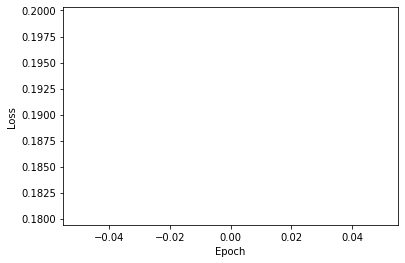

In [214]:

# Plot training & validation accuracy values
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

# # Plot training & validation loss values
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# image = load_image("/scratch/data/test2017/000000436789.jpg",size=img_size)
# image_batch = np.expand_dims(image, axis=0)
# # transfer_values1 = image_model_transfer.predict(image_batch)
# # transfer_values2 = capsule_model.predict(image_batch)
# # print(transfer_values1.shape)
# # print(transfer_values2.shape)
# transfer_values=np.concatenate([image_model_transfer.predict(image_batch),capsule_model.predict(image_batch)],1)
# print(transfer_values.shape)

In [254]:
# image_batch.shape
# import keras
# import tensorflow as tf

# config = tf.ConfigProto()
# config.gpu_options.per_process_gpu_memory_fraction = 0.9  # 0.6 sometimes works better for folks
# keras.backend.tensorflow_backend.set_session(tf.Session(config=config))

In [126]:
# def generate_caption(image_path, max_tokens=30):
#     """
#     Generate a caption for the image in the given path.
#     The caption is limited to the given number of tokens (words).
#     """

#     # Load and resize the image.
#     image = load_image(image_path, size=img_size)
    
#     # Expand the 3-dim numpy array to 4-dim
#     # because the image-model expects a whole batch as input,
#     # so we give it a batch with just one image.
#     image_batch = np.expand_dims(image, axis=0)

#     # Process the image with the pre-trained image-model
#     # to get the transfer-values.
#     transfer_values1 = image_model_transfer.predict(image_batch)
#     transfer_values2 = capsule_model.predict(image_batch)
#     transfer_values=np.concatenate([transfer_values1,transfer_values2],1)

#     # Pre-allocate the 2-dim array used as input to the decoder.
#     # This holds just a single sequence of integer-tokens,
#     # but the decoder-model expects a batch of sequences.
#     shape = (1, max_tokens)
#     decoder_input_data = np.zeros(shape=shape, dtype=np.int)

#     # The first input-token is the special start-token for 'ssss '.
#     token_int = token_start

#     # Initialize an empty output-text.
#     output_text = ''

#     # Initialize the number of tokens we have processed.
#     count_tokens = 0

#     # While we haven't sampled the special end-token for ' eeee'
#     # and we haven't processed the max number of tokens.
#     while token_int != token_end and count_tokens < max_tokens:
#         # Update the input-sequence to the decoder
#         # with the last token that was sampled.
#         # In the first iteration this will set the
#         # first element to the start-token.
#         decoder_input_data[0, count_tokens] = token_int

#         # Wrap the input-data in a dict for clarity and safety,
#         # so we are sure we input the data in the right order.
#         x_data = \
#         {
#             'transfer_values_input': transfer_values,
#             'decoder_input': decoder_input_data
#         }

#         # Note that we input the entire sequence of tokens
#         # to the decoder. This wastes a lot of computation
#         # because we are only interested in the last input
#         # and output. We could modify the code to return
#         # the GRU-states when calling predict() and then
#         # feeding these GRU-states as well the next time
#         # we call predict(), but it would make the code
#         # much more complicated.
        
#         # Input this data to the decoder and get the predicted output.
#         decoder_output = hit.predict(x_data)

#         # Get the last predicted token as a one-hot encoded array.
#         # Note that this is not limited by softmax, but we just
#         # need the index of the largest element so it doesn't matter.
#         token_onehot = decoder_output[0, count_tokens, :]

#         # Convert to an integer-token.
#         token_int = np.argmax(token_onehot)

#         # Lookup the word corresponding to this integer-token.
#         sampled_word = tokenizer.token_to_word(token_int)

#         # Append the word to the output-text.
#         output_text += " " + sampled_word

#         # Increment the token-counter.
#         count_tokens += 1

#     # This is the sequence of tokens output by the decoder.
#     output_tokens = decoder_input_data[0]

#     # Plot the image.
# #     plt.imshow(image)
# #     plt.show()
    
# #     # Print the predicted caption.
# #     print("Predicted caption:")
# #     print(output_text)

#     return output_text

In [127]:
def generate_caption(image_path, max_tokens=30):
    """
    Generate a caption for the image in the given path.
    The caption is limited to the given number of tokens (words).
    """

    # Load and resize the image.
    image = load_image(image_path, size=img_size)
    
    # Expand the 3-dim numpy array to 4-dim
    # because the image-model expects a whole batch as input,
    # so we give it a batch with just one image.
    image_batch = np.expand_dims(image, axis=0)

    # Process the image with the pre-trained image-model
    # to get the transfer-values.
    transfer_values1 = image_model_transfer.predict(image_batch)
    transfer_values2 = capsule_model.predict(image_batch)
    transfer_values=np.concatenate([transfer_values1,transfer_values2],1)

    # Pre-allocate the 2-dim array used as input to the decoder.
    # This holds just a single sequence of integer-tokens,
    # but the decoder-model expects a batch of sequences.
    shape = (1, max_tokens)
    decoder_input_data = np.zeros(shape=shape, dtype=np.int)

    # The first input-token is the special start-token for 'ssss '.
    token_int = token_start

    # Initialize an empty output-text.
    output_text = ''

    # Initialize the number of tokens we have processed.
    count_tokens = 0

    # While we haven't sampled the special end-token for ' eeee'
    # and we haven't processed the max number of tokens.
    while token_int != token_end and count_tokens < max_tokens:
        # Update the input-sequence to the decoder
        # with the last token that was sampled.
        # In the first iteration this will set the
        # first element to the start-token.
        decoder_input_data[0, count_tokens] = token_int

        # Wrap the input-data in a dict for clarity and safety,
        # so we are sure we input the data in the right order.
        x_data = \
        {
            'transfer_values_input': transfer_values,
            'decoder_input': decoder_input_data
        }

        # Note that we input the entire sequence of tokens
        # to the decoder. This wastes a lot of computation
        # because we are only interested in the last input
        # and output. We could modify the code to return
        # the GRU-states when calling predict() and then
        # feeding these GRU-states as well the next time
        # we call predict(), but it would make the code
        # much more complicated.
        
        # Input this data to the decoder and get the predicted output.
        decoder_output = decoder_model.predict(x_data)

        # Get the last predicted token as a one-hot encoded array.
        # Note that this is not limited by softmax, but we just
        # need the index of the largest element so it doesn't matter.
        token_onehot = decoder_output[0, count_tokens, :]

        # Convert to an integer-token.
        token_int = np.argmax(token_onehot)

        # Lookup the word corresponding to this integer-token.
        sampled_word = tokenizer.token_to_word(token_int)

        # Append the word to the output-text.
        output_text += " " + sampled_word

        # Increment the token-counter.
        count_tokens += 1

    # This is the sequence of tokens output by the decoder.
    output_tokens = decoder_input_data[0]

    # Plot the image.
#     plt.imshow(image)
#     plt.show()
    
#     # Print the predicted caption.
#     print("Predicted caption:")
#     print(output_text)

    return output_text

In [167]:
# tf.compat.v1.global_variables_initializer

<function tensorflow.python.ops.variables.global_variables_initializer()>

In [168]:
image = load_image("/scratch/shima/data/test2017/000000581763.jpg", size=img_size)
image.shape
image_batch = np.expand_dims(image, axis=0)
image_batch.shape


(1, 299, 299, 3)

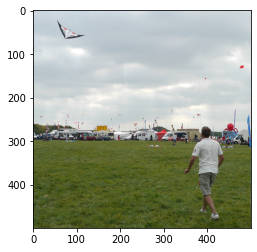

' a group of people flying kites on a beach eeee'

In [132]:
img2 = load_image("/scratch/shima/data/val2017/000000432898.jpg")
plt.imshow(img2)
plt.show()

generate_caption("/scratch/shima/data/val2017/000000432898.jpg")

In [133]:
def generate_caption_coco(idx, train=True):
    """
    Generate a caption for an image in the COCO data-set.
    Use the image with the given index in either the
    training-set (train=True) or validation-set (train=False).
    """
    
    if train:
        # Use image and captions from the training-set.
        data_dir = coco.train_dir
        filename = filenames_train[idx]
        captions = captions_train[idx]
    else:
        # Use image and captions from the validation-set.
        data_dir = coco.val_dir
        filename = filenames_test[idx]
        captions = captions_test[idx]

    # Path for the image-file.
    path = os.path.join(data_dir, filename)

    # Use the model to generate a caption of the image.
    output_text=generate_caption(image_path=path)
  

    # Print the true captions from the data-set.
#     print("True captions:")
#     for caption in captions:
#         print(caption)
        
    return output_text,captions

A gray cat standing on top of a black car.
A cat standing on the hood of a car.
Grey color cat standing on hood of car in garage
A gray cat on the hood of a black car
A cat sitting on the hood of a parked black car in a garage.


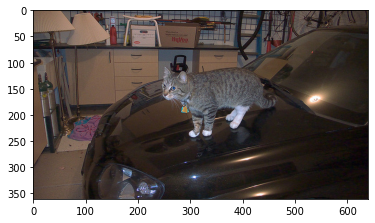

(' a cat that is standing in a mirror eeee',
 ['A gray cat standing on top of a black car.',
  'A cat standing on the hood of a car.',
  'Grey color cat standing on hood of car in garage',
  'A gray cat on the hood of a black car',
  'A cat sitting on the hood of a parked black car in a garage.'])

In [139]:
show_image(idx=102, train=False)
generate_caption_coco(idx=102, train=False)

A woman posing for the camera standing on skis.
a woman standing on skiis while posing for the camera
A woman in a red jacket skiing down a slope
A young woman is skiing down the mountain slope. 
a person on skis makes her way through the snow


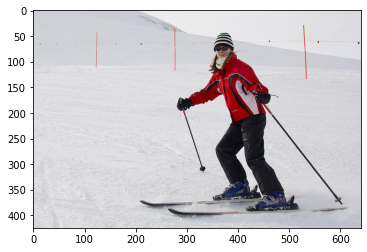

(' a person on skis is skiing down a hill eeee',
 ['A woman posing for the camera standing on skis.',
  'a woman standing on skiis while posing for the camera',
  'A woman in a red jacket skiing down a slope',
  'A young woman is skiing down the mountain slope. ',
  'a person on skis makes her way through the snow'])

In [178]:
show_image(idx=5, train=False)
generate_caption_coco(idx=5, train=False)

A red fire hydrant sitting on a sidewalk.
a red fire hydrant on a red bricked sidewalk,
A hydrant is shown on the side of the walkway.
A WOMAN IS STANDIG ON THE PAVEMENT LOOKING 
A red fire hydrant is on the brick sidewalk.


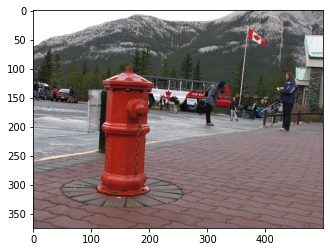

(' a fire hydrant on the side of a road eeee',
 ['A red fire hydrant sitting on a sidewalk.',
  'a red fire hydrant on a red bricked sidewalk,',
  'A hydrant is shown on the side of the walkway.',
  'A WOMAN IS STANDIG ON THE PAVEMENT LOOKING ',
  'A red fire hydrant is on the brick sidewalk.'])

In [184]:
show_image(idx=896, train=False)
generate_caption_coco(idx=896, train=False)

A person on skis skiing down a mountain slope.
A MAN IS SKIING ON THE SNOW SLOPES
A skier is in the snow going downhill.
A person with green skis skiing down a big hill.
A person on skis is skiing down a snowy hill. 


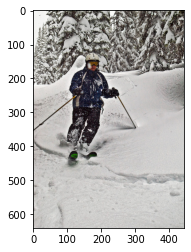

(' a person is skiing down a hill with a snow board eeee',
 ['A person on skis skiing down a mountain slope.',
  'A MAN IS SKIING ON THE SNOW SLOPES',
  'A skier is in the snow going downhill.',
  'A person with green skis skiing down a big hill.',
  'A person on skis is skiing down a snowy hill. '])

In [190]:
show_image(idx=53, train=False)
generate_caption_coco(idx=53, train=False)

A young child squats down in front of a bowl.
a little boy kneeling down while attempting to stick his hand in a bowl of water
A young boy dressed in a tie plays outside by a water bowl.
Nicely dressed little boy gets ready to play in the dirt.
A little boy dipping his hand into water.


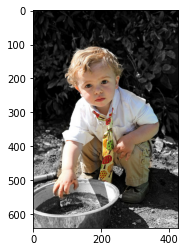

(' a man with a hat and a tie eeee',
 ['A young child squats down in front of a bowl.',
  'a little boy kneeling down while attempting to stick his hand in a bowl of water',
  'A young boy dressed in a tie plays outside by a water bowl.',
  'Nicely dressed little boy gets ready to play in the dirt.',
  'A little boy dipping his hand into water.'])

In [192]:
show_image(idx=200, train=False)
generate_caption_coco(idx=200, train=False)

a big purple bus parked in a parking spot
A purple bus can't be missed on the city streets.
a big purple public bus called south tyne
A city bus drives through a city area.
City bus driving through pedestrian saturated area near crosswalk.


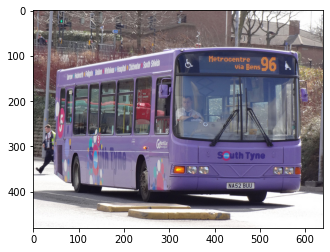

(' larger minibuses may be called midibuses eeee',
 ['a big purple bus parked in a parking spot',
  "A purple bus can't be missed on the city streets.",
  'a big purple public bus called south tyne',
  'A city bus drives through a city area.',
  'City bus driving through pedestrian saturated area near crosswalk.'])

In [193]:
show_image(idx=22, train=False)
generate_caption_coco(idx=22, train=False)

A little cat looking at itself in a mirror.
A white and orange cat looking at itself in front of a mirror. 
a brown and white cat looking it itself in a mirror
An orange and white cat standing in front of a mirror.
A cat on a porch looking at it's reflection. 


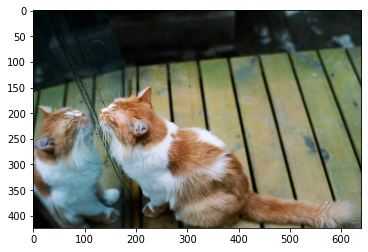

(' a cat is sitting on a bench with a cat on it eeee',
 ['A little cat looking at itself in a mirror.',
  'A white and orange cat looking at itself in front of a mirror. ',
  'a brown and white cat looking it itself in a mirror',
  'An orange and white cat standing in front of a mirror.',
  "A cat on a porch looking at it's reflection. "])

In [194]:
show_image(idx=436, train=False)
generate_caption_coco(idx=436, train=False)

A presenter projected on a large screen at a conference.
People watching an on screen presentation of a gentleman in a suit.
People watch a man delivering a lecture on a screen.
a large screen showing a person wearing a suit
An audience is looking at an film of a man taking that is projected onto a wall. 


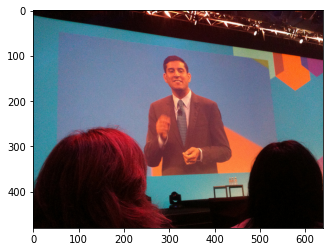

(' a group of people are standing together in a room eeee',
 ['A presenter projected on a large screen at a conference.',
  'People watching an on screen presentation of a gentleman in a suit.',
  'People watch a man delivering a lecture on a screen.',
  'a large screen showing a person wearing a suit',
  'An audience is looking at an film of a man taking that is projected onto a wall. '])

In [200]:
show_image(idx=83,train=False)
generate_caption_coco(idx=83, train=False)

A group of giraffe Standing up against a dirt wall in front of a crowd of children.
A large group of people holding their arms out to feed giraffes.
A group of children feeding two giraffes at a zoo.
A group of people trying to feed giraffes at the zoo
Zoo scene of children at zoo near giraffes, attempting to pet or feed them.  


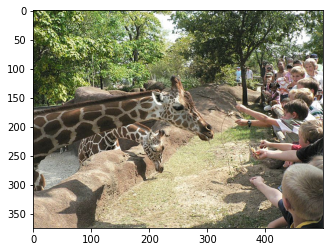

(' a giraffe is walking in the grass eeee',
 ['A group of giraffe Standing up against a dirt wall in front of a crowd of children.',
  'A large group of people holding their arms out to feed giraffes.',
  'A group of children feeding two giraffes at a zoo.',
  'A group of people trying to feed giraffes at the zoo',
  'Zoo scene of children at zoo near giraffes, attempting to pet or feed them.  '])

In [201]:
show_image(idx=573, train=False)
generate_caption_coco(idx=573, train=False)

A passenger bus pulling up to the side of a street.
A bus sitting still on the side of the road. 
A bus that is sitting on the street.
A bus is traveling down the city street.
a bus stops to pick up some passengers


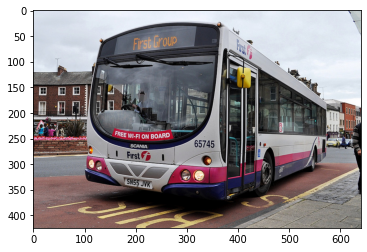

(' a double decker bus is parked on the street eeee',
 ['A passenger bus pulling up to the side of a street.',
  'A bus sitting still on the side of the road. ',
  'A bus that is sitting on the street.',
  'A bus is traveling down the city street.',
  'a bus stops to pick up some passengers'])

In [204]:
show_image(idx=48, train=False)
generate_caption_coco(idx=48, train=False)

Many small children are posing together in the black and white photo. 
A vintage school picture of grade school aged children.
A black and white photo of a group of kids.
A group of children standing next to each other.
A group of children standing and sitting beside each other. 


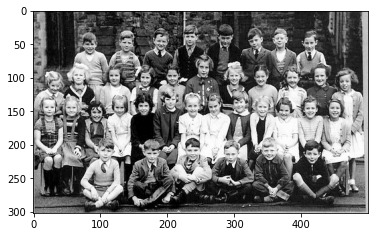

(' a group of people are standing together in a field eeee',
 ['Many small children are posing together in the black and white photo. ',
  'A vintage school picture of grade school aged children.',
  'A black and white photo of a group of kids.',
  'A group of children standing next to each other.',
  'A group of children standing and sitting beside each other. '])

In [207]:
show_image(idx=27, train=False)
generate_caption_coco(idx=27, train=False)

Baseball team holding batting practice on the field
a number of baseball players with bats 
Teen baseball player ready to bat while other teammates take practice swings in background.
three baseball players holding up bats on a baseball diamond
A group of people stand with bats on a field.


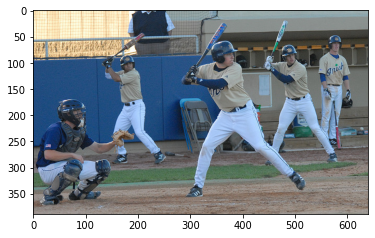

(' a baseball player is holding a bat at a baseball game eeee',
 ['Baseball team holding batting practice on the field',
  'a number of baseball players with bats ',
  'Teen baseball player ready to bat while other teammates take practice swings in background.',
  'three baseball players holding up bats on a baseball diamond',
  'A group of people stand with bats on a field.'])

In [208]:
show_image(idx=1368, train=False)
generate_caption_coco(idx=1368, train=False)

Large canoe with many people on lake with trees lining shore.
A group of people paddle a long canoe in a clear lake bordered by pine woods.
Several people in a large rowboat with oars.
A big boat full of a lot of people.
A thick evergreen forest marks the boundary of a dark expanse of water, on which rests a long boat with packages at the rear and people to the fore, several holding long oars. 


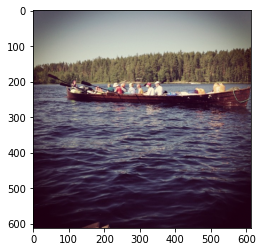

(' a canoe is a lightweight narrow vessel typically pointed at both ends and open on top propelled by one or more seated or kneeling paddlers facing the direction of travel',
 ['Large canoe with many people on lake with trees lining shore.',
  'A group of people paddle a long canoe in a clear lake bordered by pine woods.',
  'Several people in a large rowboat with oars.',
  'A big boat full of a lot of people.',
  'A thick evergreen forest marks the boundary of a dark expanse of water, on which rests a long boat with packages at the rear and people to the fore, several holding long oars. '])

In [213]:
show_image(idx=1630, train=False)
generate_caption_coco(idx=1630, train=False)

A foot long hot dog sitting on top of a bun.
A hotdog with mustard and relish is being prepared in a food cart.
A person prepares a hot dog with mustard and ketchup.
A hot dog that has some ketchup and mustard on it.
There is a hotdog sitting among many condiments.


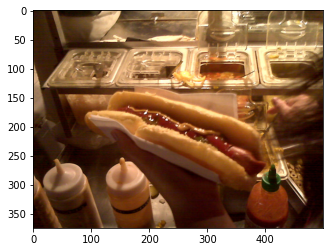

(' a hot dog also spelled hotdog is a grilled or steamed sausage sandwich where the sausage is served in the slit of a partially sliced bun eeee',
 ['A foot long hot dog sitting on top of a bun.',
  'A hotdog with mustard and relish is being prepared in a food cart.',
  'A person prepares a hot dog with mustard and ketchup.',
  'A hot dog that has some ketchup and mustard on it.',
  'There is a hotdog sitting among many condiments.'])

In [214]:
show_image(idx=4520, train=False)
generate_caption_coco(idx=4520, train=False)

A pond of water with three giraffe walking in the dirt.
three giraffes walking on a gravel ground near a body of water
A herd of giraffe walking along a dirt road.
Three giraffes with heads pointing ahead walk on a dirt path.
Giraffes walking near water surrounded by a forest.


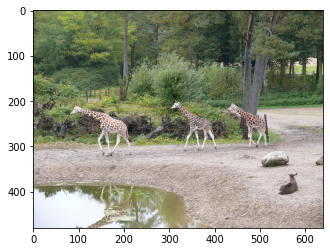

(' the coat is generally a shade of brown eeee',
 ['A pond of water with three giraffe walking in the dirt.',
  'three giraffes walking on a gravel ground near a body of water',
  'A herd of giraffe walking along a dirt road.',
  'Three giraffes with heads pointing ahead walk on a dirt path.',
  'Giraffes walking near water surrounded by a forest.'])

In [215]:
show_image(idx=414, train=False)
generate_caption_coco(idx=414, train=False)

A pizza is prepared with cheese, tomato sauce, and broccoli. 
A pizza is split down the middle is shown.
A pizza covered with lots of broccoli sitting on a kitchen counter.
A half broccoli half cheese pizza that needs to be cooked. 
An unbaked pizza with cheese and herbs on one half and broccoli on the second.


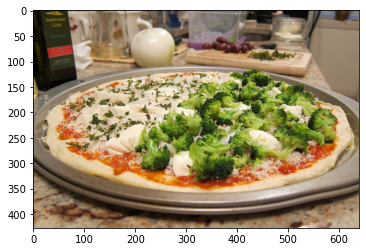

(' a pizza with a plate of food eeee',
 ['A pizza is prepared with cheese, tomato sauce, and broccoli. ',
  'A pizza is split down the middle is shown.',
  'A pizza covered with lots of broccoli sitting on a kitchen counter.',
  'A half broccoli half cheese pizza that needs to be cooked. ',
  'An unbaked pizza with cheese and herbs on one half and broccoli on the second.'])

In [216]:
show_image(idx=794, train=False)
generate_caption_coco(idx=794, train=False)

Raw mango and orange and ripe bananas in a bowl
A papia, orange and bruised banana sitting in a bowl.
A pear, orange, and two bananas in a wooden bowl.
a couple of pieces of fruit are in a bowl 
a bowl with a mango, orange, and banana in it


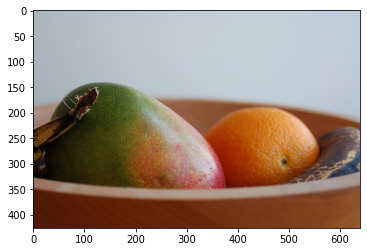

(' the fruits grow in clusters hanging from the top of the plant eeee',
 ['Raw mango and orange and ripe bananas in a bowl',
  'A papia, orange and bruised banana sitting in a bowl.',
  'A pear, orange, and two bananas in a wooden bowl.',
  'a couple of pieces of fruit are in a bowl ',
  'a bowl with a mango, orange, and banana in it'])

In [217]:
show_image(idx=3045, train=False)
generate_caption_coco(idx=3045, train=False)

An open refrigerator including bottles of various food.
This refrigerator is packed with many foods and drinks
An open refrigerator filled up with food and condiments. 
The contents of a refrigerator filled to over flowing
an open refrigerator in a kitchen next to a counter


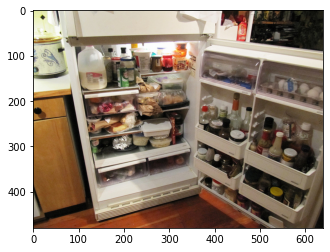

(' a refrigerator maintains a temperature a few degrees above the freezing point of water eeee',
 ['An open refrigerator including bottles of various food.',
  'This refrigerator is packed with many foods and drinks',
  'An open refrigerator filled up with food and condiments. ',
  'The contents of a refrigerator filled to over flowing',
  'an open refrigerator in a kitchen next to a counter'])

In [219]:
show_image(idx=630, train=False)
generate_caption_coco(idx=630, train=False)

A humming bird standing on top of a green feeder.
A small bird resting and eating from a bird feeder.
a small bird on a bird feeder 
The bird is standing on the rim of the bird feeder.
A small bird contemplates how to get some seeds.


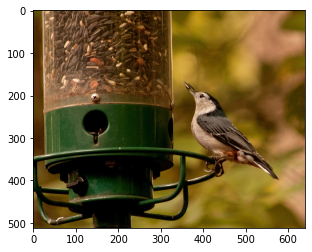

(' a bird is sitting on a tree in the background eeee',
 ['A humming bird standing on top of a green feeder.',
  'A small bird resting and eating from a bird feeder.',
  'a small bird on a bird feeder ',
  'The bird is standing on the rim of the bird feeder.',
  'A small bird contemplates how to get some seeds.'])

In [220]:
show_image(idx=2445, train=False)
generate_caption_coco(idx=2445, train=False)

A silver and green train crossing over the tracks
A train passes on a bridge atop a street.
A large long train on a steel track.
The train is going over the busy urban bridge.
a green orange and silver train and some cars


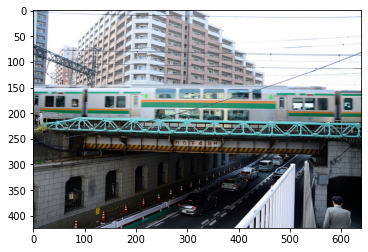

(' a train is traveling down the tracks in the eeee',
 ['A silver and green train crossing over the tracks',
  'A train passes on a bridge atop a street.',
  'A large long train on a steel track.',
  'The train is going over the busy urban bridge.',
  'a green orange and silver train and some cars'])

In [222]:
show_image(idx=3394, train=False)
generate_caption_coco(idx=3394, train=False)

A large round piece of bread on a metal pan.
a loaf of bread is sitting on top of a oven
A loaf of bread hits on top of an oven.
A loaf of freshly baked artisan bread. 
some kind of bread that is on a pan


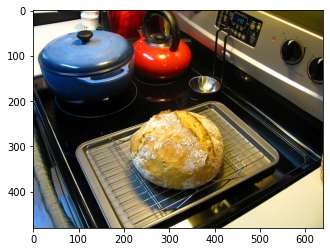

(' a man is holding a small cake in a kitchen eeee',
 ['A large round piece of bread on a metal pan.',
  'a loaf of bread is sitting on top of a oven',
  'A loaf of bread hits on top of an oven.',
  'A loaf of freshly baked artisan bread. ',
  'some kind of bread that is on a pan'])

In [223]:
show_image(idx=1178, train=False)
generate_caption_coco(idx=1178, train=False)

These platters display healthy food choices of two entrees with a side  vegetable and fruit
A served tray filled with smaller plates of food
A lunch tray with multiple compartments filled with food.
Four plastic containers filled with food on a table.
A four compartment tray holding various food items.


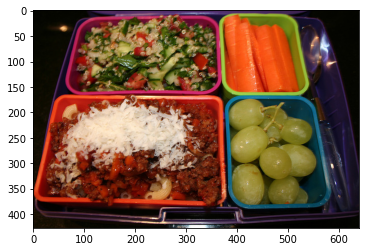

(' a plate of food with vegetables and other vegetables eeee',
 ['These platters display healthy food choices of two entrees with a side  vegetable and fruit',
  'A served tray filled with smaller plates of food',
  'A lunch tray with multiple compartments filled with food.',
  'Four plastic containers filled with food on a table.',
  'A four compartment tray holding various food items.'])

In [224]:
show_image(idx=145, train=False)
generate_caption_coco(idx=145, train=False)

Several fruits and veggies are ready to be eaten. 
A table with two black trays of food that include raspberries and broccoli.
A bento box filled with sushi and vegetables.
Broccoli, green beans and various other foods in a tray.
Dishes filled with sushi, fruit, and vegetables on a table.


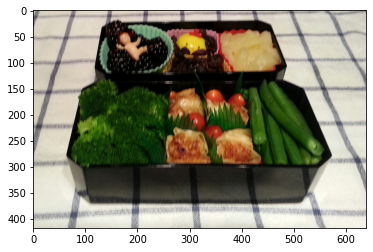

(' a table with a vegetables and a salad eeee',
 ['Several fruits and veggies are ready to be eaten. ',
  'A table with two black trays of food that include raspberries and broccoli.',
  'A bento box filled with sushi and vegetables.',
  'Broccoli, green beans and various other foods in a tray.',
  'Dishes filled with sushi, fruit, and vegetables on a table.'])

In [225]:
show_image(idx=4462, train=False)
generate_caption_coco(idx=4462, train=False)

A man on a court swinging a tennis racket.
A tennis player is looking up to the sky.
A black and white photo of a man playing tennis.
Black and white photograph of a man playing tennis
A man swinging a tennis racket in a t-shirt


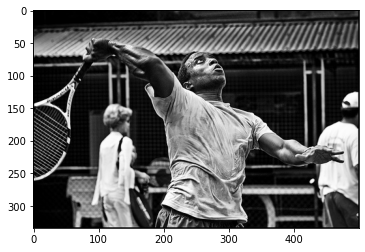

(' a man is holding a tennis racket on a tennis court eeee',
 ['A man on a court swinging a tennis racket.',
  'A tennis player is looking up to the sky.',
  'A black and white photo of a man playing tennis.',
  'Black and white photograph of a man playing tennis',
  'A man swinging a tennis racket in a t-shirt'])

In [226]:
show_image(idx=3292, train=False)
generate_caption_coco(idx=3292, train=False)

A double city bus is pulled up to a bus stop.
A city street scene with a bus and buildings.
A city white bus stopped at a bus stop in front of tall buldings.
A stopped bus pulled up to the bus stop
A city bus that is stopped at a bus stop


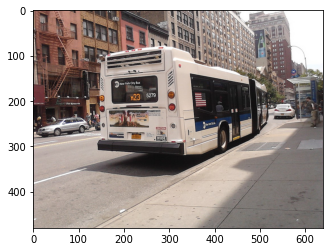

(' a large bus is parked on the side of a street eeee',
 ['A double city bus is pulled up to a bus stop.',
  'A city street scene with a bus and buildings.',
  'A city white bus stopped at a bus stop in front of tall buldings.',
  'A stopped bus pulled up to the bus stop',
  'A city bus that is stopped at a bus stop'])

In [236]:
show_image(idx=2921, train=False)
generate_caption_coco(idx=2921, train=False)

Many small motorbikes are parked along the street. 
Numerous motor scooters parked by backing in facing the street
A line of motor scooters in front of a bar.
A row of parked motorcycles sitting in front of a restaurants.
A group of motorcycles are parked on the street.


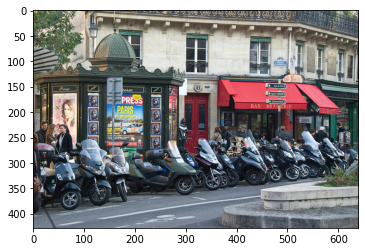

(' a group of people on a motorcycle near a motorcycle eeee',
 ['Many small motorbikes are parked along the street. ',
  'Numerous motor scooters parked by backing in facing the street',
  'A line of motor scooters in front of a bar.',
  'A row of parked motorcycles sitting in front of a restaurants.',
  'A group of motorcycles are parked on the street.'])

In [235]:
show_image(idx=190, train=False)
generate_caption_coco(idx=190, train=False)

A person that is surfing in the water.
A man on a surfboard surfing a wave in the ocean.
A man riding a wave on a surfboard.
a surfer in a white shirt  surfing on a sunny day
A man on a surfboard riding an ocean wave.


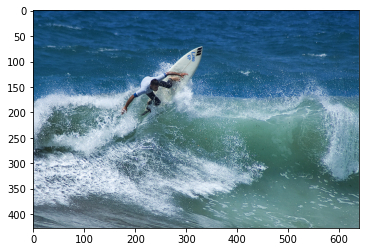

(' a person in a and a black surf board eeee',
 ['A person that is surfing in the water.',
  'A man on a surfboard surfing a wave in the ocean.',
  'A man riding a wave on a surfboard.',
  'a surfer in a white shirt  surfing on a sunny day',
  'A man on a surfboard riding an ocean wave.'])

In [234]:
show_image(idx=703, train=False)
generate_caption_coco(idx=703, train=False)

a male tennis player in white shorts is playing tennis
This woman has just returned a volley in tennis
A man holding a tennis racket playing tennis.
The man balances on one leg after serving a tennis ball.
Someone playing in a tennis tournament with a crowd looking on.


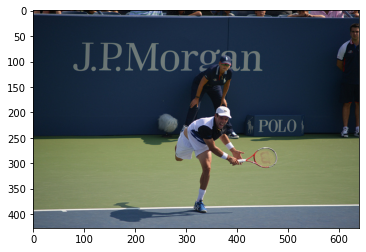

(' a tennis ball is a ball designed for the sport of tennis eeee',
 ['a male tennis player in white shorts is playing tennis',
  'This woman has just returned a volley in tennis',
  'A man holding a tennis racket playing tennis.',
  'The man balances on one leg after serving a tennis ball.',
  'Someone playing in a tennis tournament with a crowd looking on.'])

In [230]:
show_image(idx=8, train=False)
generate_caption_coco(idx=8, train=False)

Two people standing on a tennis court playing tennis
Two mean are playing tennis and both are wearing sunglasses.  
Two people playing a game of tennis with rackets.
two tennis players on a court with rackets
Two men with tennis rackets playing doubles tennis.


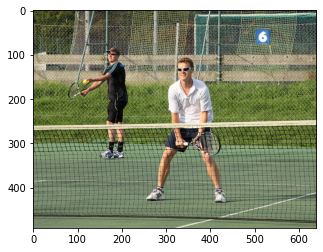

(' a man is holding a tennis racket eeee',
 ['Two people standing on a tennis court playing tennis',
  'Two mean are playing tennis and both are wearing sunglasses.  ',
  'Two people playing a game of tennis with rackets.',
  'two tennis players on a court with rackets',
  'Two men with tennis rackets playing doubles tennis.'])

In [229]:
show_image(idx=1778, train=False)
generate_caption_coco(idx=1778, train=False)

Three zebras standing in front of a wall.
A group of zebras stand together by a rock wall. 
This is an image of several zebra in a zoo.
Four zebras stand together in the mud against a wall.
A herd of zebra standing next to each other against a stone wall.


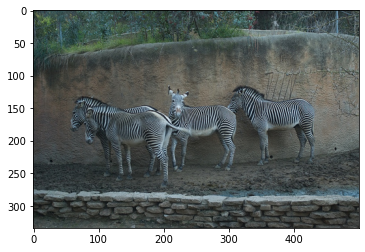

(' a zebra and a zebra in a field eeee',
 ['Three zebras standing in front of a wall.',
  'A group of zebras stand together by a rock wall. ',
  'This is an image of several zebra in a zoo.',
  'Four zebras stand together in the mud against a wall.',
  'A herd of zebra standing next to each other against a stone wall.'])

In [228]:
show_image(idx=606, train=False)
generate_caption_coco(idx=606, train=False)

A toddler celebrates his birthday with a cupcake.
A young boy with a spoon looking at a birthday cupcake.
A baby holding a spoon looking at a cupcake and candle.
A child holds a spoon and looks at a cupcake.
a young child looking at a birthday cupcake


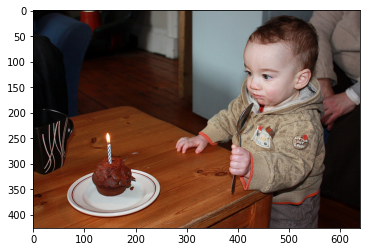

(' a man cutting a cake with a cake eeee',
 ['A toddler celebrates his birthday with a cupcake.',
  'A young boy with a spoon looking at a birthday cupcake.',
  'A baby holding a spoon looking at a cupcake and candle.',
  'A child holds a spoon and looks at a cupcake.',
  'a young child looking at a birthday cupcake'])

In [243]:
show_image(idx=983, train=False)
generate_caption_coco(idx=983, train=False)

A woman and her child sitting nest to a man on a park bench.
a couple and their small baby girl are sitting on a bench
A man and woman sit on benches with a small child.
A baby sitting between a lady and a man on a bench under a tree.
a couple sitting on a bench with a little girl


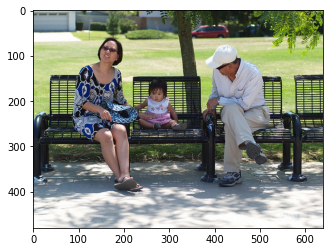

(' a man sitting on a bench with a dog in the background eeee',
 ['A woman and her child sitting nest to a man on a park bench.',
  'a couple and their small baby girl are sitting on a bench',
  'A man and woman sit on benches with a small child.',
  'A baby sitting between a lady and a man on a bench under a tree.',
  'a couple sitting on a bench with a little girl'])

In [242]:
show_image(idx=744, train=False)
generate_caption_coco(idx=744, train=False)

A man wearing a suit and tie and red hat with a silver buckle.
A man wearing a blue blazer is also wearing a red hat.
A man wearing a red hat and a suit and tie.
A man with a red hat is in the city.
A man in a red hat, suit, and blue striped tie walks past two other men on a street.


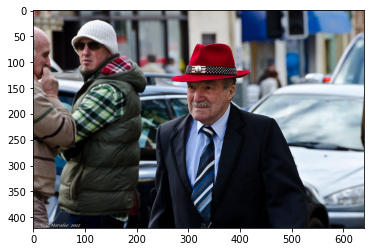

(' a man wearing a hat and a hat and a tie eeee',
 ['A man wearing a suit and tie and red hat with a silver buckle.',
  'A man wearing a blue blazer is also wearing a red hat.',
  'A man wearing a red hat and a suit and tie.',
  'A man with a red hat is in the city.',
  'A man in a red hat, suit, and blue striped tie walks past two other men on a street.'])

In [246]:
show_image(idx=515, train=False)
generate_caption_coco(idx=515, train=False)

A person is surfing in a wave pool.
A woman in black wetsuit surfing on wave river.
A surfer is surfing in a wave simulator.
There is a man surfing on some waves.
A surfer is riding a wave on a narrow waterway.


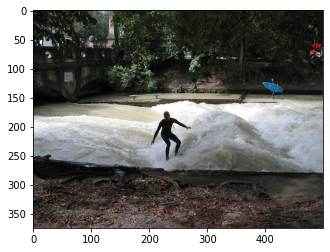

(' a man is riding a board with a skateboard in the background eeee',
 ['A person is surfing in a wave pool.',
  'A woman in black wetsuit surfing on wave river.',
  'A surfer is surfing in a wave simulator.',
  'There is a man surfing on some waves.',
  'A surfer is riding a wave on a narrow waterway.'])

In [248]:
show_image(idx=362, train=False)
generate_caption_coco(idx=362, train=False)

In [140]:
[Predicted_caption,True_captions]=generate_caption_coco(idx=103, train=False)
print(True_captions)

['a plate of meat topped with potatoes veggies and gravy', 'A white plate with a pile of food on it.', 'A large pile of food on a plate with knife.', 'A white plate sitting on a table filled with food. ', 'Plate of food with gravy on mesh table with knife']


In [141]:
print(Predicted_caption)

 a plate of food with a sandwich and a and a salad eeee


In [142]:
from nltk.translate.bleu_score import SmoothingFunction
from nltk.translate.bleu_score import sentence_bleu
chencherry = SmoothingFunction()

for idxx in range(len(filenames_val)):
    [Predicted_caption,True_captions]=generate_caption_coco(idx=idxx, train=False)
    candidate=Predicted_caption.split()
    reference=[]
    for caption in True_captions:
        reference.append(caption.split())

#     print('Cumulative bleu-1: %f' % sentence_bleu(reference, candidate, weights=(1, 0, 0, 0), smoothing_function=chencherry.method4))
#     print('Cumulative bleu-2: %f' % sentence_bleu(reference, candidate, weights=(0.5, 0.5, 0, 0), smoothing_function=chencherry.method4))
#     print('Cumulative bleu=3: %f' % sentence_bleu(reference, candidate, weights=(0.33, 0.33, 0.33, 0), smoothing_function=chencherry.method4))
#     print('Cumulative bleu-4: %f' % sentence_bleu(reference, candidate, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=chencherry.method4))

In [143]:
def my_lcs(string, sub):
    """
    Calculates longest common subsequence for a pair of tokenized strings
    :param string : list of str : tokens from a string split using whitespace
    :param sub : list of str : shorter string, also split using whitespace
    :returns: length (list of int): length of the longest common subsequence between the two strings

    Note: my_lcs only gives length of the longest common subsequence, not the actual LCS
    """
    if(len(string)< len(sub)):
        sub, string = string, sub

    lengths = [[0 for i in range(0,len(sub)+1)] for j in range(0,len(string)+1)]

    for j in range(1,len(sub)+1):
        for i in range(1,len(string)+1):
            if(string[i-1] == sub[j-1]):
                lengths[i][j] = lengths[i-1][j-1] + 1
            else:
                lengths[i][j] = max(lengths[i-1][j] , lengths[i][j-1])

    return lengths[len(string)][len(sub)]

In [144]:
    def calc_score(candidate, refs):
        """
        Compute ROUGE-L score given one candidate and references for an image
        :param candidate: str : candidate sentence to be evaluated
        :param refs: list of str : COCO reference sentences for the particular image to be evaluated
        :returns score: int (ROUGE-L score for the candidate evaluated against references)
        """
        beta=1.2
#         assert(len(candidate)==1)	
#         assert(len(refs)>0)         
        prec = []
        rec = []

        # split into tokens
        token_c = candidate.split(" ")
        for reference in refs:
            # split into tokens
            token_r = reference.split(" ")
            # compute the longest common subsequence
            lcs = my_lcs(token_r, token_c)
            prec.append(lcs/float(len(token_c)))
            rec.append(lcs/float(len(token_r)))

        prec_max = max(prec)
        rec_max = max(rec)

        if(prec_max!=0 and rec_max !=0):
            score = ((1 + beta**2)*prec_max*rec_max)/float(rec_max + beta**2*prec_max)
        else:
            score = 0.0
        return score


In [146]:
# import nltk
from prettytable import PrettyTable
from nltk.translate.bleu_score import SmoothingFunction
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.meteor_score import meteor_score

nltk.download('wordnet')
chencherry = SmoothingFunction()

# for idxx in range(len(filenames_val)):
dat_dtype = {
        'names' : ('idx', 'BLEU_1','BLEU_2','BLEU_3','BLEU_4','ROUGE','METEOR'),
        'formats' : ('i', 'f','f','f','f','f','f')}
dat = np.zeros(len(filenames_val), dat_dtype)
# dat = np.zeros(1000, dat_dtype)
x = PrettyTable(dat.dtype.names)
for idxx in range(len(filenames_val)):
# for idxx in range(1000):
    candidate=[]
    reference=[]
    [Predicted_caption,True_captions]=generate_caption_coco(idx=idxx, train=False)
    candidate=Predicted_caption.split()
    for caption in True_captions:
        reference.append(caption.split())
    dat['idx'][idxx] = idxx
    dat['BLEU_1'][idxx] = sentence_bleu(reference, candidate, weights=(1, 0, 0, 0), smoothing_function=chencherry.method4)
    dat['BLEU_2'][idxx] = sentence_bleu(reference, candidate, weights=(0.5, 0.5, 0, 0), smoothing_function=chencherry.method4)
    dat['BLEU_3'][idxx] = sentence_bleu(reference, candidate, weights=(0.33, 0.33, 0.33, 0), smoothing_function=chencherry.method4)
    dat['BLEU_4'][idxx] = sentence_bleu(reference, candidate, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=chencherry.method4)    
    dat['ROUGE'][idxx] = calc_score(Predicted_caption, True_captions)
    dat['METEOR'][idxx] = round(meteor_score(True_captions,Predicted_caption),4)
    
np.save('results',dat)
# for row in dat:
#     x.add_row(row)

# print(x)




[nltk_data] Downloading package wordnet to
[nltk_data]     /home/javanmardis/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [147]:
for row in dat:
    x.add_row(row)

print(x)


+------+-------------+-------------+-------------+-------------+-------------+--------+
| idx  |    BLEU_1   |    BLEU_2   |    BLEU_3   |    BLEU_4   |    ROUGE    | METEOR |
+------+-------------+-------------+-------------+-------------+-------------+--------+
|  0   |     0.7     |  0.62360954 |  0.5297522  |   0.451801  |  0.61101836 | 0.6975 |
|  1   |    0.3125   |  0.14433756 |  0.18131082 |  0.21384566 |  0.25666198 | 0.2273 |
|  2   |  0.13333334 |  0.10656757 |  0.11454655 | 0.123550706 |  0.11476952 | 0.1282 |
|  3   |  0.13333334 |  0.10656757 |  0.11454655 | 0.123550706 | 0.104184456 | 0.125  |
|  4   |  0.33333334 |  0.24618298 |  0.18545148 |  0.24103181 |  0.28197226 | 0.3094 |
|  5   |     0.8     |  0.73029673 |  0.6465017  |  0.44179183 |  0.38425198 | 0.4121 |
|  6   |  0.13333334 |  0.06780635 | 0.084993936 |  0.09855256 |  0.15627669 | 0.2884 |
|  7   |  0.41666666 |  0.19462474 |  0.25118002 |  0.30331132 |  0.28197226 | 0.3394 |
|  8   |  0.3846154  |  0.179028

In [152]:
from prettytable import PrettyTable
dat2_dtype = {
        'names' : ('BLEU_1','BLEU_2','BLEU_3','BLEU_4','ROUGE','METEOR'),
        'formats' : ('f','f','f','f','f','f')}
dat2 = np.zeros(1, dat2_dtype)
x2 = PrettyTable(dat2.dtype.names)

dat2['BLEU_1']=np.mean(dat['BLEU_1'])
dat2['BLEU_2']=np.mean(dat['BLEU_2'])
dat2['BLEU_3']=np.mean(dat['BLEU_3'])
dat2['BLEU_4']=np.mean(dat['BLEU_4'])
# dat2['ROUGE']=np.mean(dat['ROUGE'])
# dat2['METEOR']=np.mean(dat['METEOR'])

# for row in dat2:
#     x2.add_row(row)
# print(x2)
# # print(dat2)
# np.save('dat_VGG',dat2)
# data = np.load('dat_VGG.npy')
# # print the array
# print(data)


In [250]:
np.mean(dat['BLEU_3'][350:400])

0.3351847

In [ ]:
dat=np.load('results1.npy')

In [156]:
from prettytable import PrettyTable
dat2_dtype = {
        'names' : ('BLEU_1','BLEU_2','BLEU_3','BLEU_4','ROUGE','METEOR'),
        'formats' : ('f','f','f','f','f','f')}
dat2 = np.ones(3, dat2_dtype)
x2 = PrettyTable(dat2.dtype.names)

dat2['BLEU_1'][0]=np.max(dat['BLEU_1'])
dat2['BLEU_2'][0]=np.max(dat['BLEU_2'])
dat2['BLEU_3'][0]=np.max(dat['BLEU_3'])
dat2['BLEU_4'][0]=np.max(dat['BLEU_4'])
dat2['ROUGE'][0]=np.max(dat['ROUGE'])
dat2['METEOR'][0]=np.max(dat['METEOR'])
dat2['BLEU_1'][1]=np.mean(dat['BLEU_1'])
dat2['BLEU_2'][1]=np.mean(dat['BLEU_2'])
dat2['BLEU_3'][1]=np.mean(dat['BLEU_3'])
dat2['BLEU_4'][1]=np.mean(dat['BLEU_4'])
dat2['ROUGE'][1]=np.mean(dat['ROUGE'])
dat2['METEOR'][1]=np.mean(dat['METEOR'])
# dat2['BLEU_1'][2]=np.min(dat['BLEU_1'])
# dat2['BLEU_2'][2]=np.min(dat['BLEU_2'])
# dat2['BLEU_3'][2]=np.min(dat['BLEU_3'])
# dat2['BLEU_4'][2]=np.min(dat['BLEU_4'])
# dat2['ROUGE'][2]=np.min(dat['ROUGE'])
# dat2['METEOR'][2]=np.min(dat['METEOR'])
dat2['BLEU_1'][2]=np.mean(dat2['BLEU_1'])
dat2['BLEU_2'][2]=np.mean(dat2['BLEU_2'])
dat2['BLEU_3'][2]=np.mean(dat2['BLEU_3'])
dat2['BLEU_4'][2]=np.mean(dat2['BLEU_4'])
dat2['ROUGE'][2]=np.mean(dat2['ROUGE'])
dat2['METEOR'][2]=np.mean(dat2['METEOR'])
for row in dat2:
    x2.add_row(row)
print(x2)
# print(dat2)
np.save('dat_VGG',dat2)
# data = np.load('dat_VGG.npy')
# # print the array
# print(data)


+------------+------------+------------+-----------+------------+------------+
|   BLEU_1   |   BLEU_2   |   BLEU_3   |   BLEU_4  |   ROUGE    |   METEOR   |
+------------+------------+------------+-----------+------------+------------+
| 0.9166667  | 0.90453404 | 0.86143553 | 0.8408964 | 0.8798077  |   0.9765   |
| 0.42845848 | 0.30520347 | 0.30277827 | 0.3408529 | 0.29302937 | 0.30115235 |
| 0.7817084  | 0.7365792  | 0.72140455 | 0.7272498 |  0.724279  | 0.75921744 |
+------------+------------+------------+-----------+------------+------------+


In [ ]:
np.mean(dat2['BLEU_1'])

In [ ]:
np.load('dat_VGG.npy')

In [ ]:
candidate=['a',
 'plane',
 'flying',
 'in',
 'the',
 'sky',
 'with',
 'a',
 'lot',
 'of',
 'smoke',
 'eeee']
reference=[['A', 'big', 'airplane', 'flying', 'in', 'the', 'big', 'blue', 'sky'],
 ['Large,', 'two', 'decked,', 'four', 'engined', 'airliner', 'in', 'flight.'],
 ['An', 'AirFrance', 'jet', 'airplane', 'flying', 'in', 'the', 'sky'],
 ['A', 'big', 'plane', 'with', 'AirFrance', 'on', 'the', 'side', 'of', 'it.'],
 ['An', 'Air', 'France', 'air', 'plane', 'in', 'mid', 'flight.']]


In [ ]:
reference=[]
for caption in True_captions:
    reference.append(caption.split())
reference
    

# EVALUATE Bleu-1,2,3,4 Metric

In [ ]:
from nltk.translate.bleu_score import SmoothingFunction
from nltk.translate.bleu_score import sentence_bleu
# score=sentence_bleu(reference,candidate)
chencherry = SmoothingFunction()
print('Cumulative bleu-1: %f' % sentence_bleu(reference, candidate, weights=(1, 0, 0, 0), smoothing_function=chencherry.method4))
print('Cumulative bleu-2: %f' % sentence_bleu(reference, candidate, weights=(0.5, 0.5, 0, 0), smoothing_function=chencherry.method4))
print('Cumulative bleu=3: %f' % sentence_bleu(reference, candidate, weights=(0.33, 0.33, 0.33, 0), smoothing_function=chencherry.method4))
print('Cumulative bleu-4: %f' % sentence_bleu(reference, candidate, weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=chencherry.method4))

In [ ]:
True_captions[0]


# METEOR

In [ ]:
import nltk
nltk.download('wordnet')

In [ ]:
True_captions

In [ ]:
from nltk.translate.meteor_score import meteor_score
round(meteor_score(True_captions,Predicted_caption),4)

# ROUGE

In [ ]:
calc_score(Predicted_caption, True_captions)

# CIDEr

In [ ]:
# from nltk.translate.bleu_score import sentence_bleu
# print('Cumulative 1-gram: %f' % sentence_bleu(reference, candidate, weights=(1, 0, 0, 0)))
# print('Cumulative 2-gram: %f' % sentence_bleu(reference, candidate, weights=(0.5, 0.5, 0, 0)))
# print('Cumulative 3-gram: %f' % sentence_bleu(reference, candidate, weights=(0.33, 0.33, 0.33, 0)))
# print('Cumulative 4-gram: %f' % sentence_bleu(reference, candidate, weights=(0.25, 0.25, 0.25, 0.25)))

In [ ]:
generate_caption_coco(idx=10, train=True)

In [ ]:
generate_caption_coco(idx=1, train=False)

## Question



* Train the model for more epochs. Does it improve the quality of the generated captions?
* Try another architecture for the Recurrent Neural Network, e.g. change the number of GRU layers, their internal state-size, the embedding-size, etc. Can you improve the quality of the generated captions?
* Use another transfer-layer from the VGG16-model, for example the flattened output of the last convolutional layer.
* Try adding more dense-layers to the mapping between the transfer-values and the initial-state in the decoder.
* When generating captions, instead of using `np.argmax()` to sample the next integer-token, could you sample the decoder's output as if it was a probability distribution instead? Note that the decoder's output is not softmax-limited so you have to do that first to turn it into a probability-distribution.
* Can you generate multiple sequences by doing this sampling? Can you find a way to select the best of these different sequences?
* Connect the image-model directly to the decoder so you can fine-tune the weights of the image-model. See Tutorial #10 on Fine-Tuning.
* Can you train a Machine Translation model from Tutorial #21 and then connect its decoder to a pre-trained image-model to make an image captioning model? Perhaps you need an intermediate fully-connected layer that you will train.
* Can you measure the quality of the generated captions using some mathematical formula?
* Modify the decoder so it also returns the states of the GRU-units. Then change `generate_caption()` so it only inputs and outputs one integer-token in each iteration. You need to get the GRU-states out of `decoder_model.predict()` and feed them back in next time you call it. Now you compute less in each iteration, but there is still a lot of overhead, so it may not be much faster when using a GPU?
* Explain to a friend how the program works.